In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

train_data_path = "../data/train/"
test_data_path = "../data/test/"

train_data_files = ["AAPL", "BRK_B", "DVN","NVDA", "PCG", "ROST", "V", "VNQ"]
test_data_files = ["LOW", "TSLA"]

vis_path = "../visualizations/"

### Data Preprocessing
Converting currency amounts to floats, parsing dates, saving modifications.

In [27]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + ".csv", parse_dates=["Date"], index_col="Date")

	df[['Close/Last']] = df[['Close/Last']].replace('[\$,]','',regex=True).astype(float)
	df[['Open']] = df[['Open']].replace('[\$,]','',regex=True).astype(float)
	df[['High']] = df[['High']].replace('[\$,]','',regex=True).astype(float)
	df[['Low']] = df[['Low']].replace('[\$,]','',regex=True).astype(float)

	df.to_csv(train_data_path + f"{f}_clean.csv")

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + ".csv", parse_dates=["Date"], index_col="Date")

	df[['Close/Last']] = df[['Close/Last']].replace('[\$,]','',regex=True).astype(float)
	df[['Open']] = df[['Open']].replace('[\$,]','',regex=True).astype(float)
	df[['High']] = df[['High']].replace('[\$,]','',regex=True).astype(float)
	df[['Low']] = df[['Low']].replace('[\$,]','',regex=True).astype(float)

	df.to_csv(test_data_path + f"{f}_clean.csv")

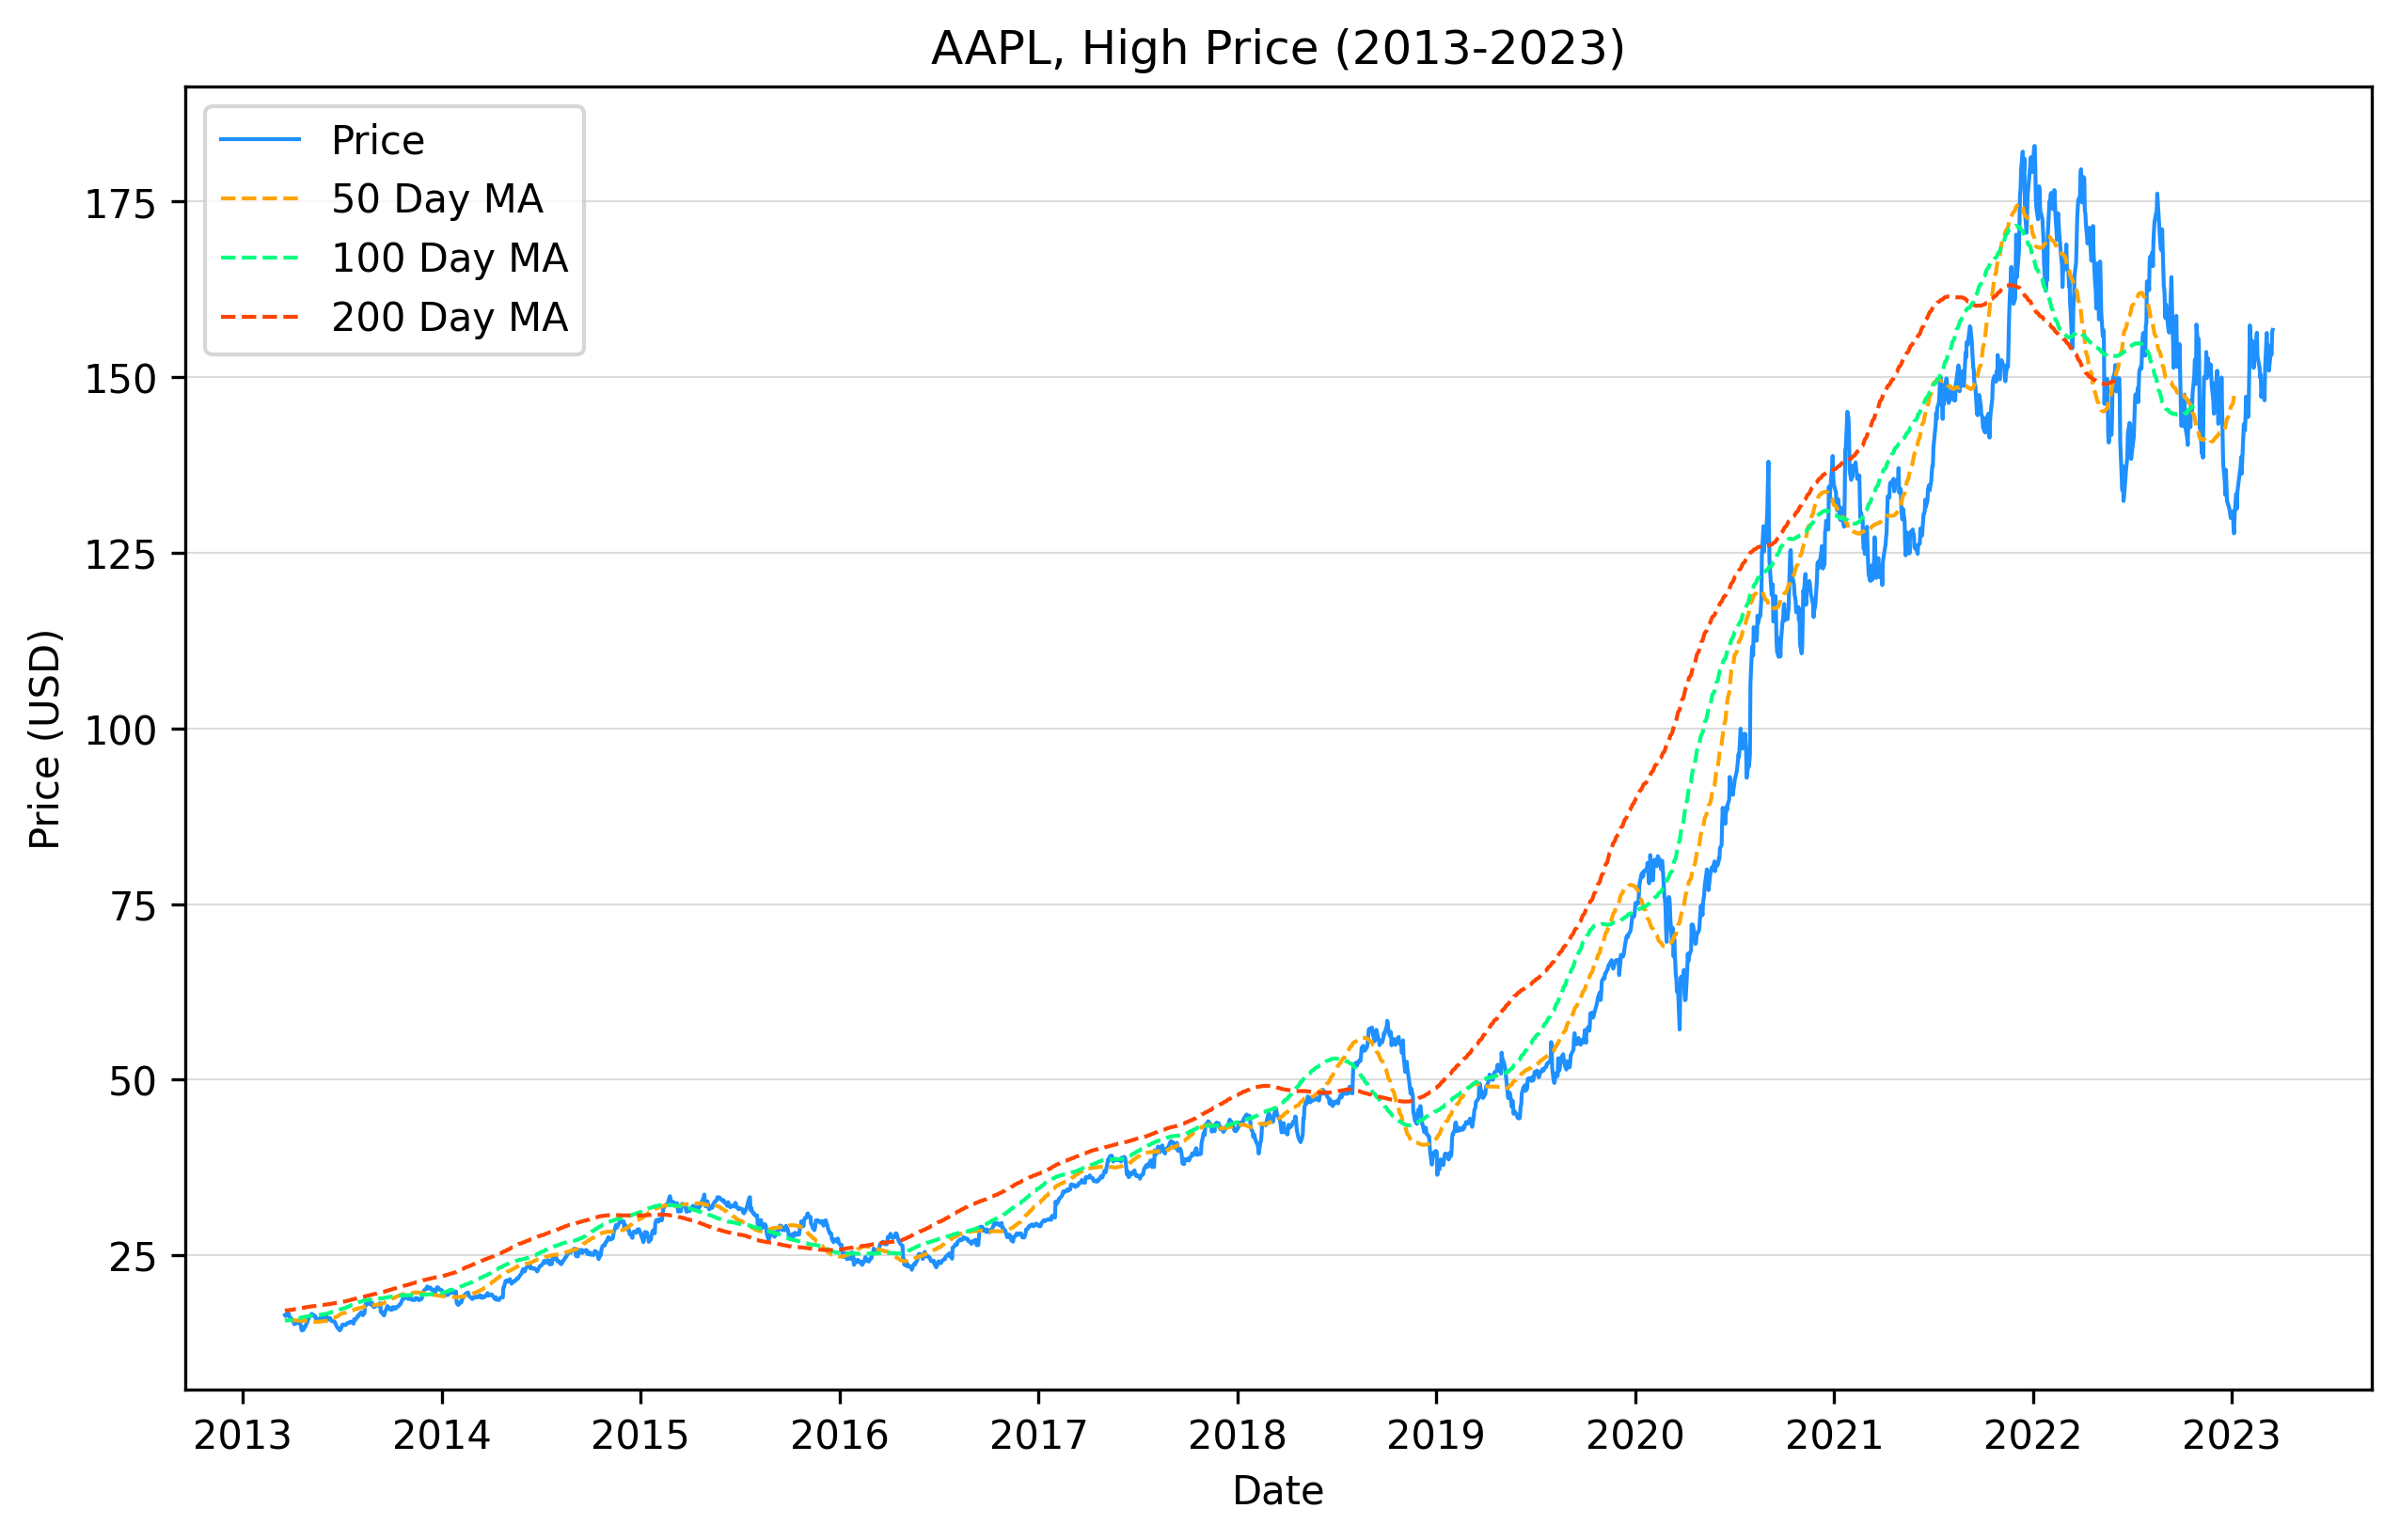

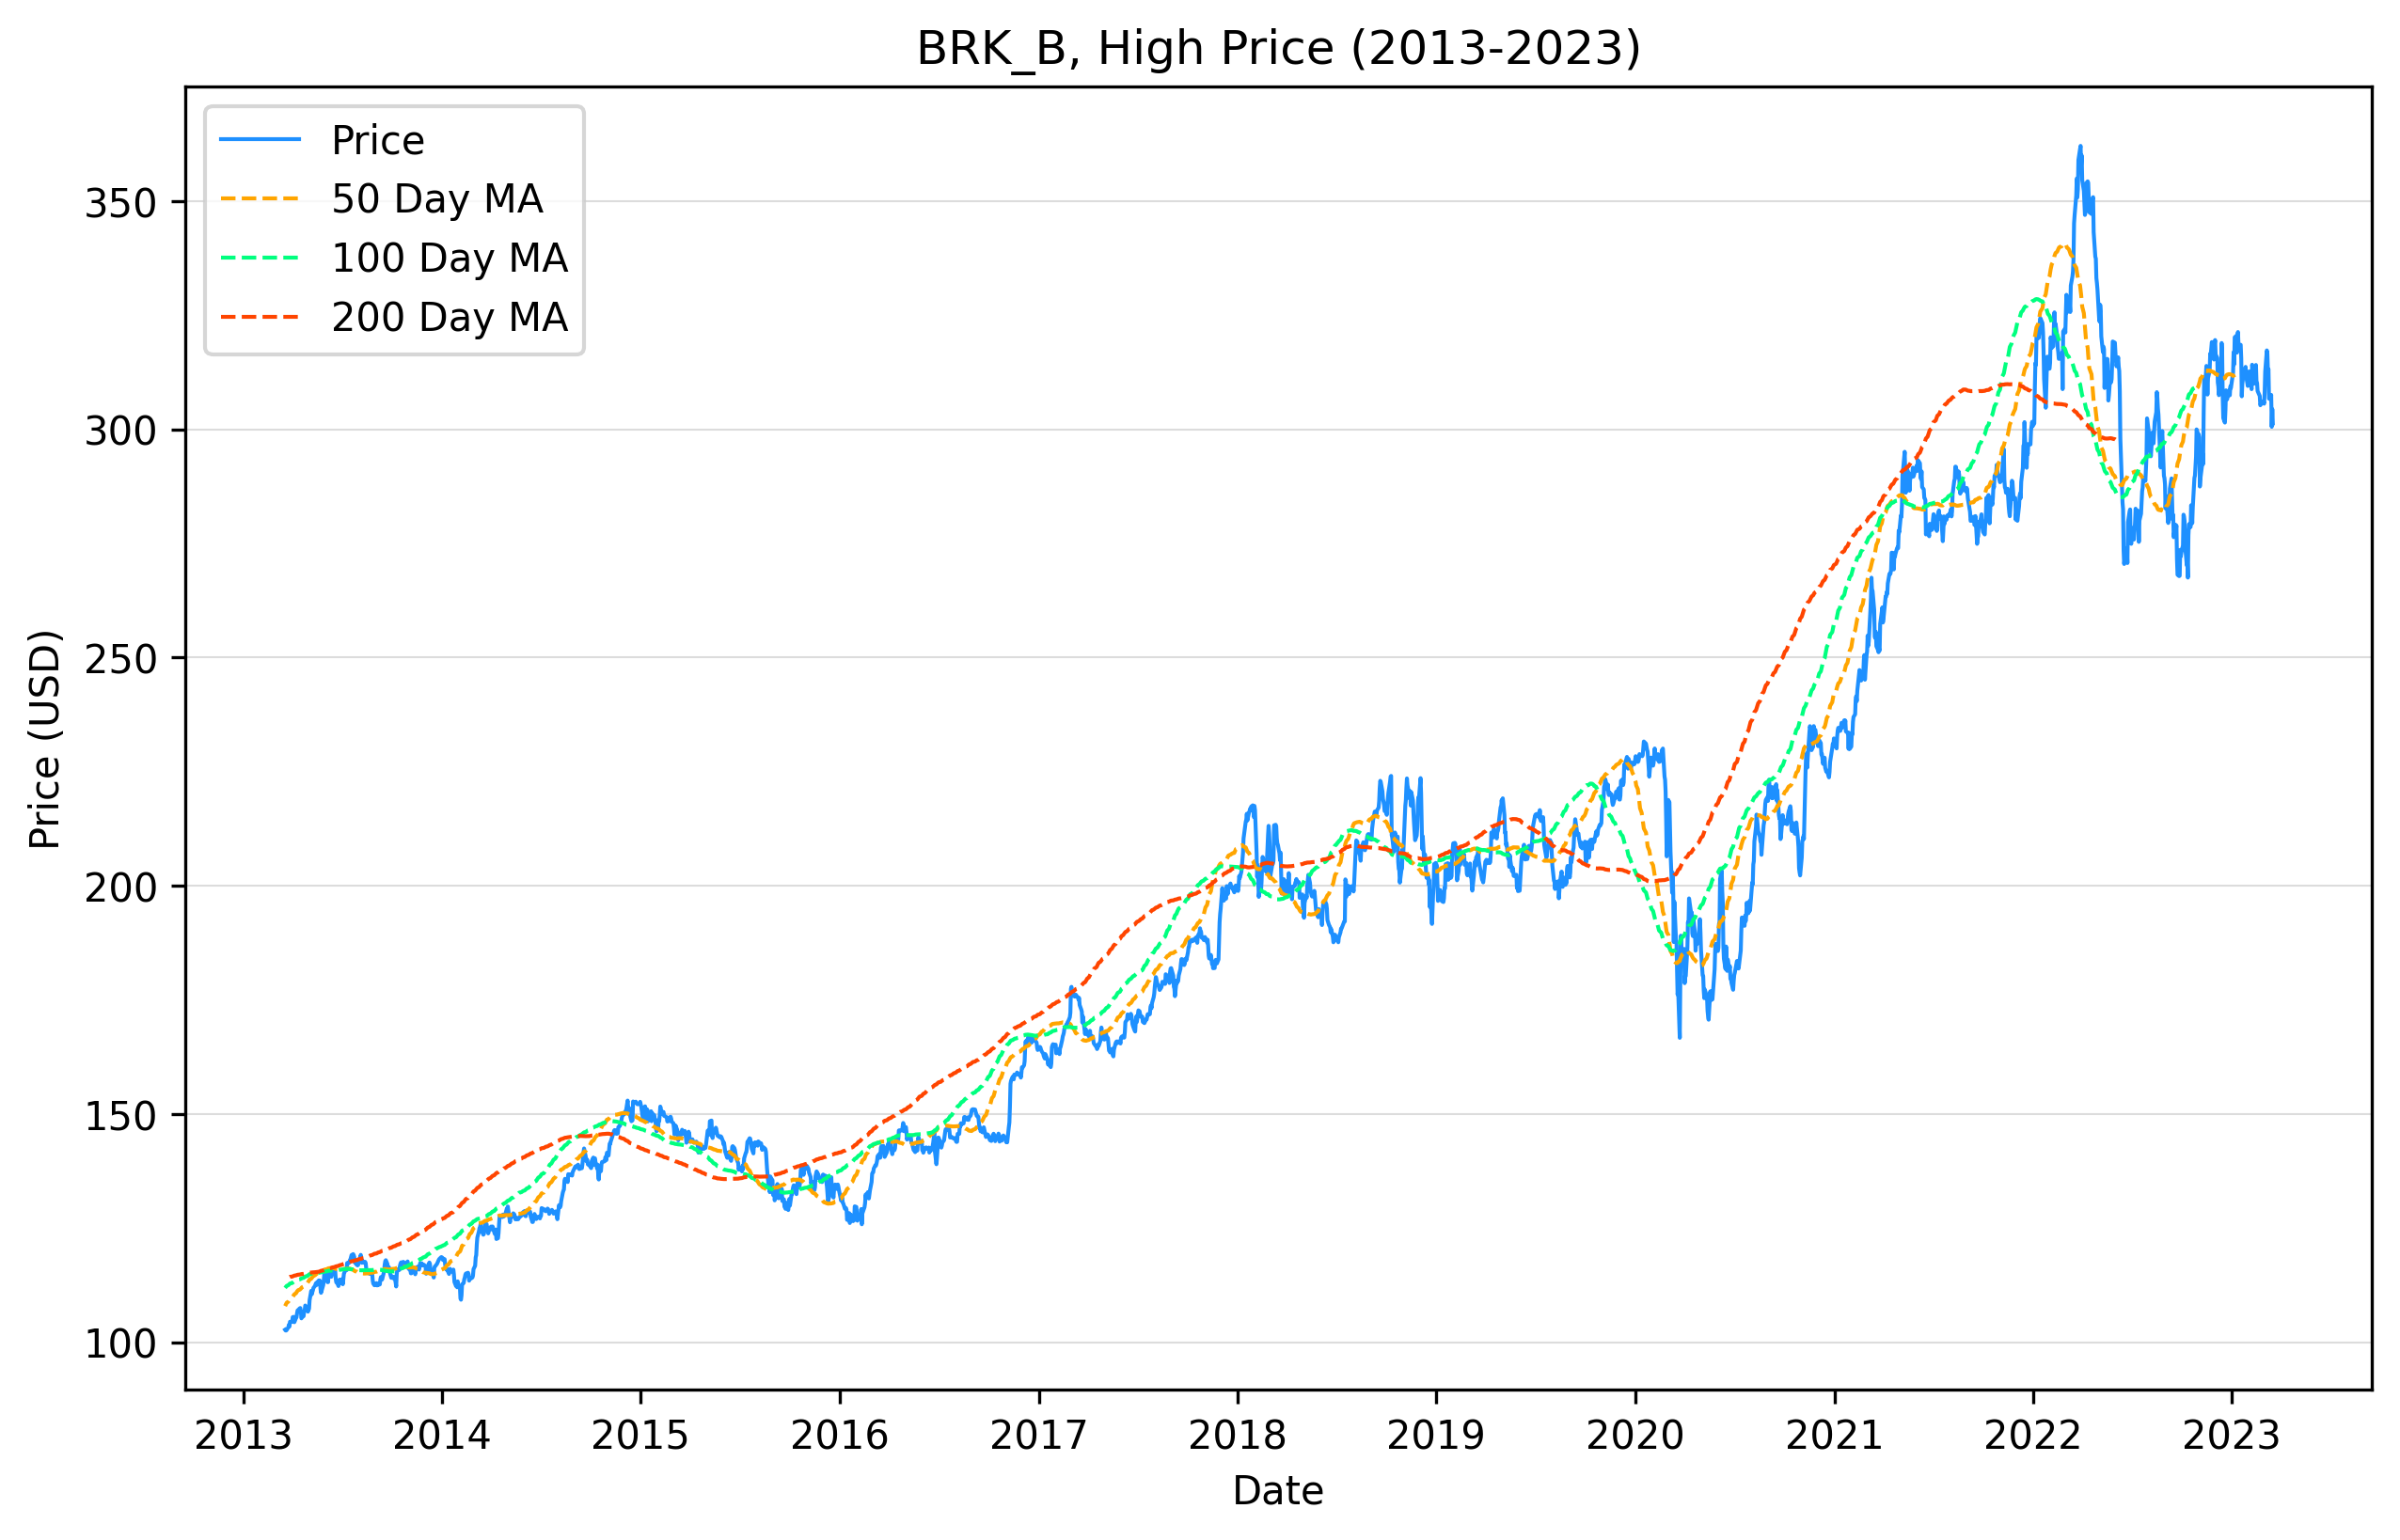

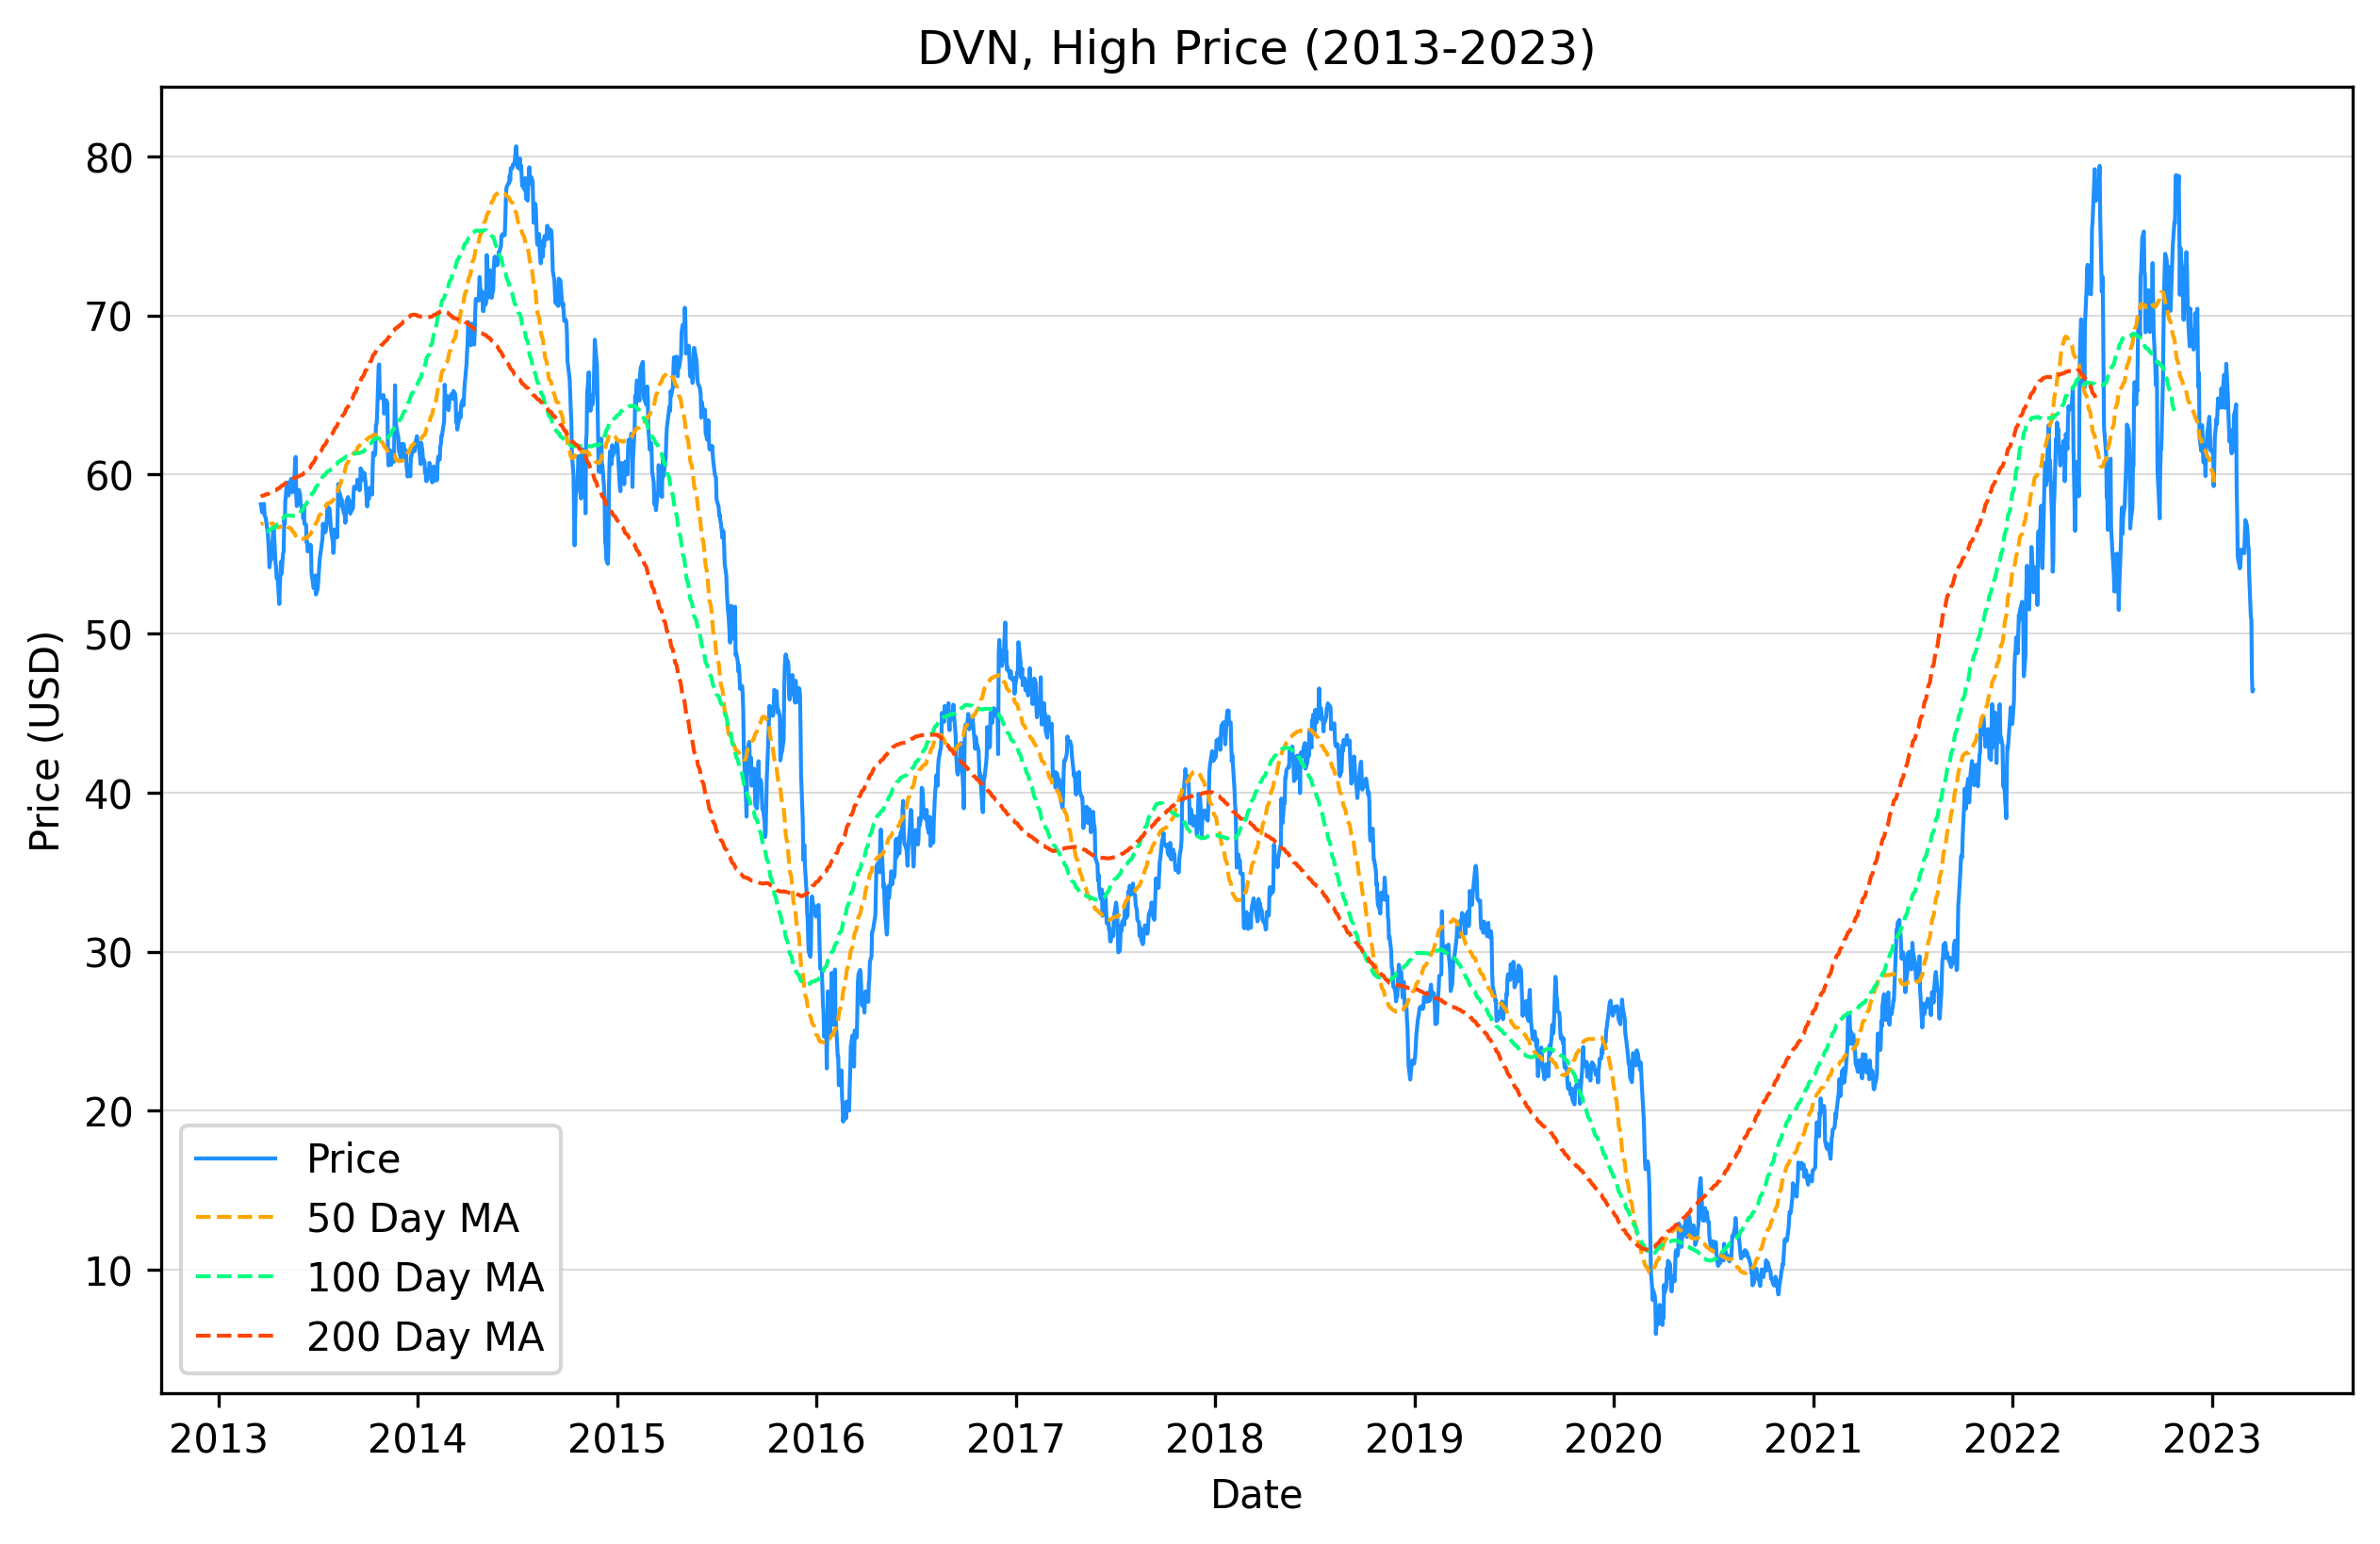

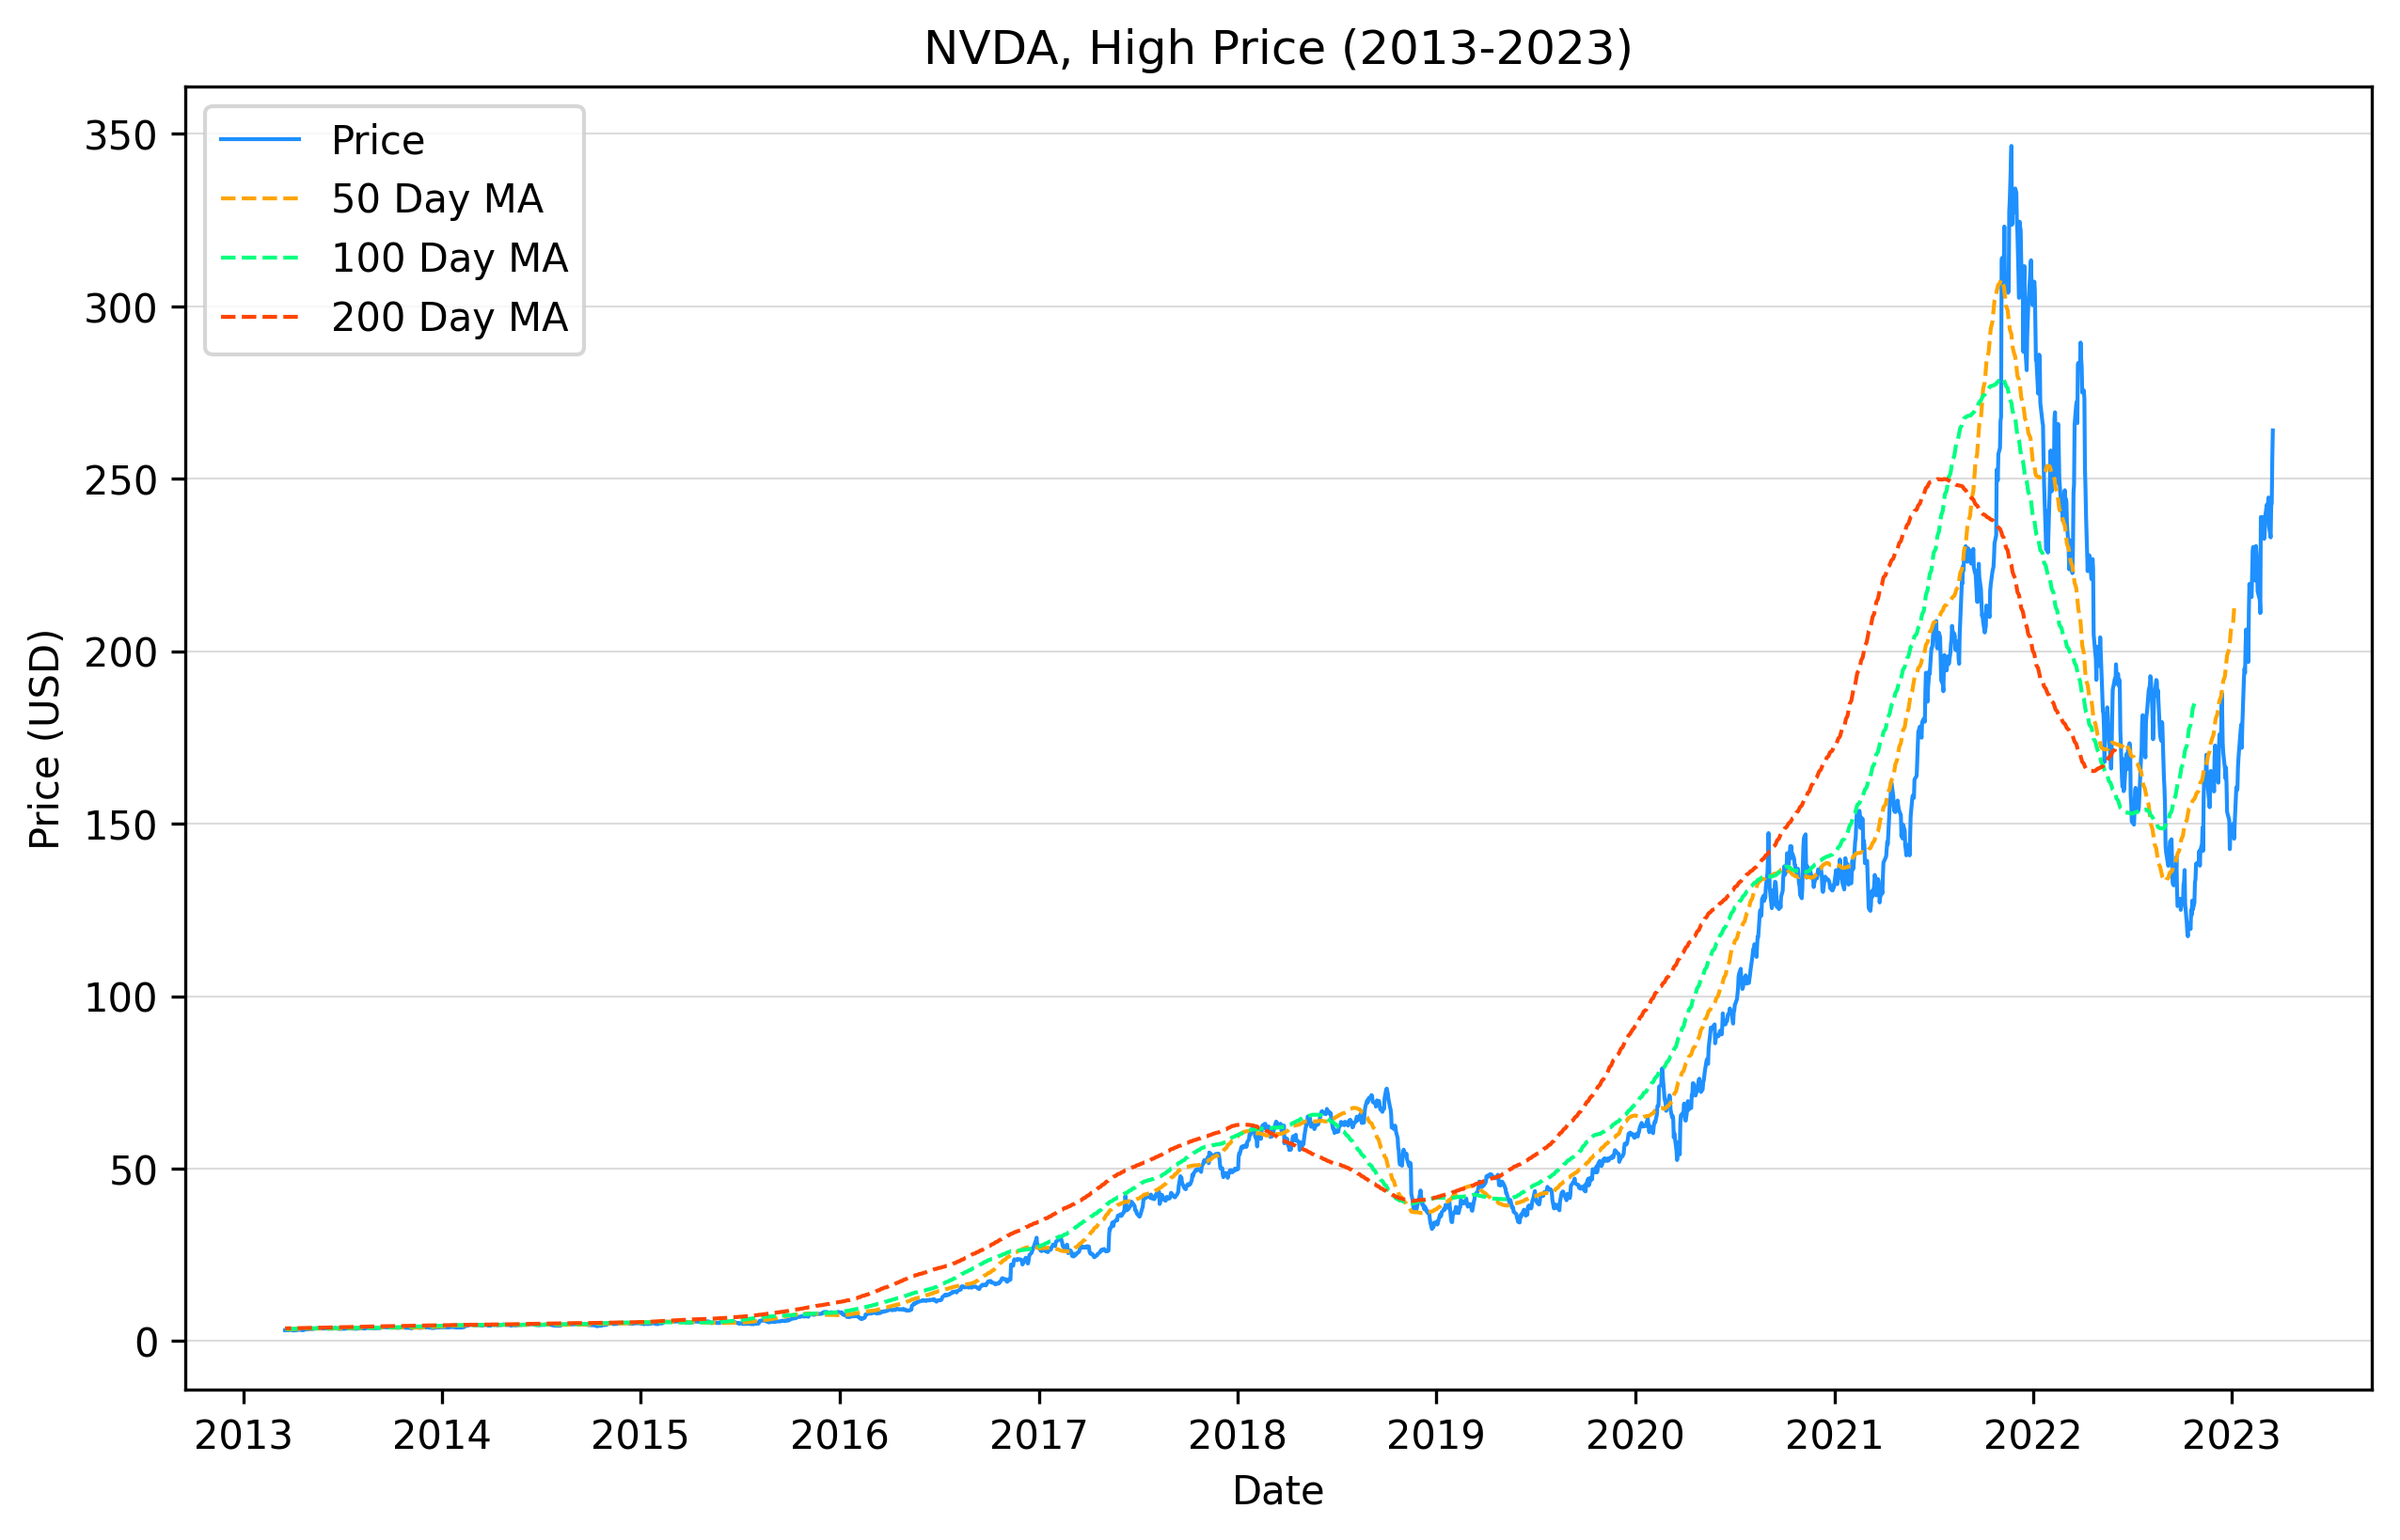

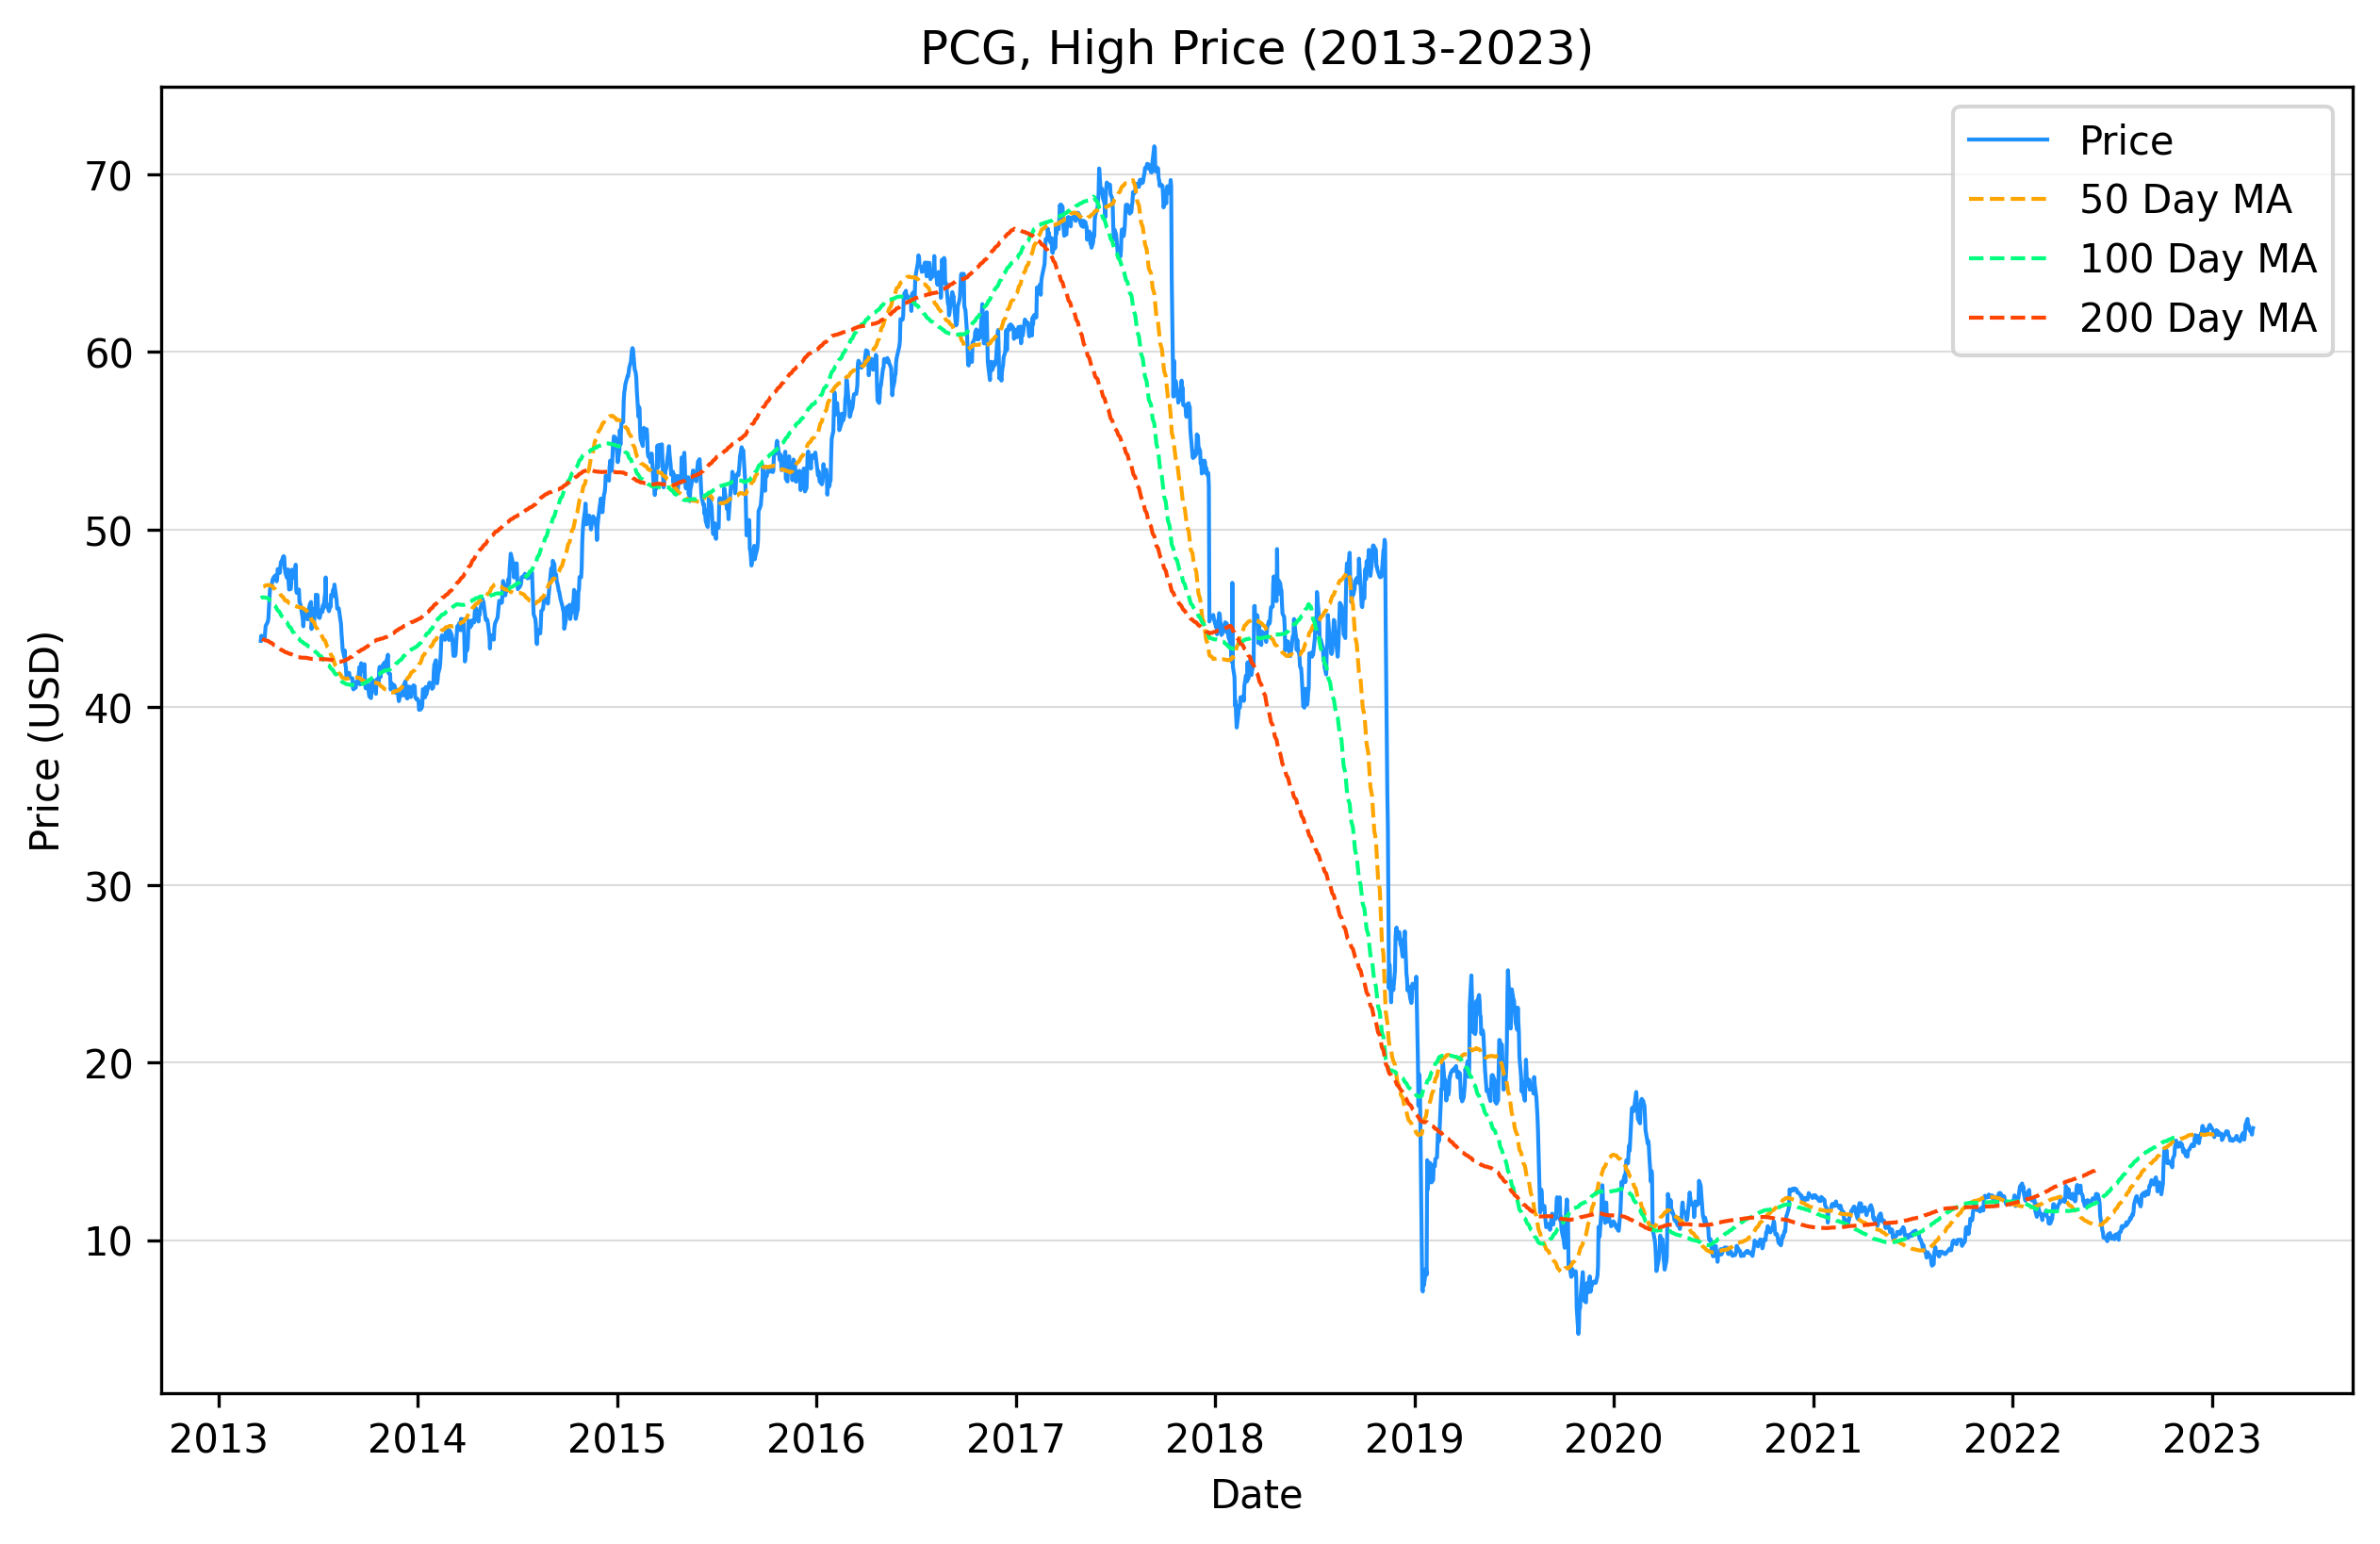

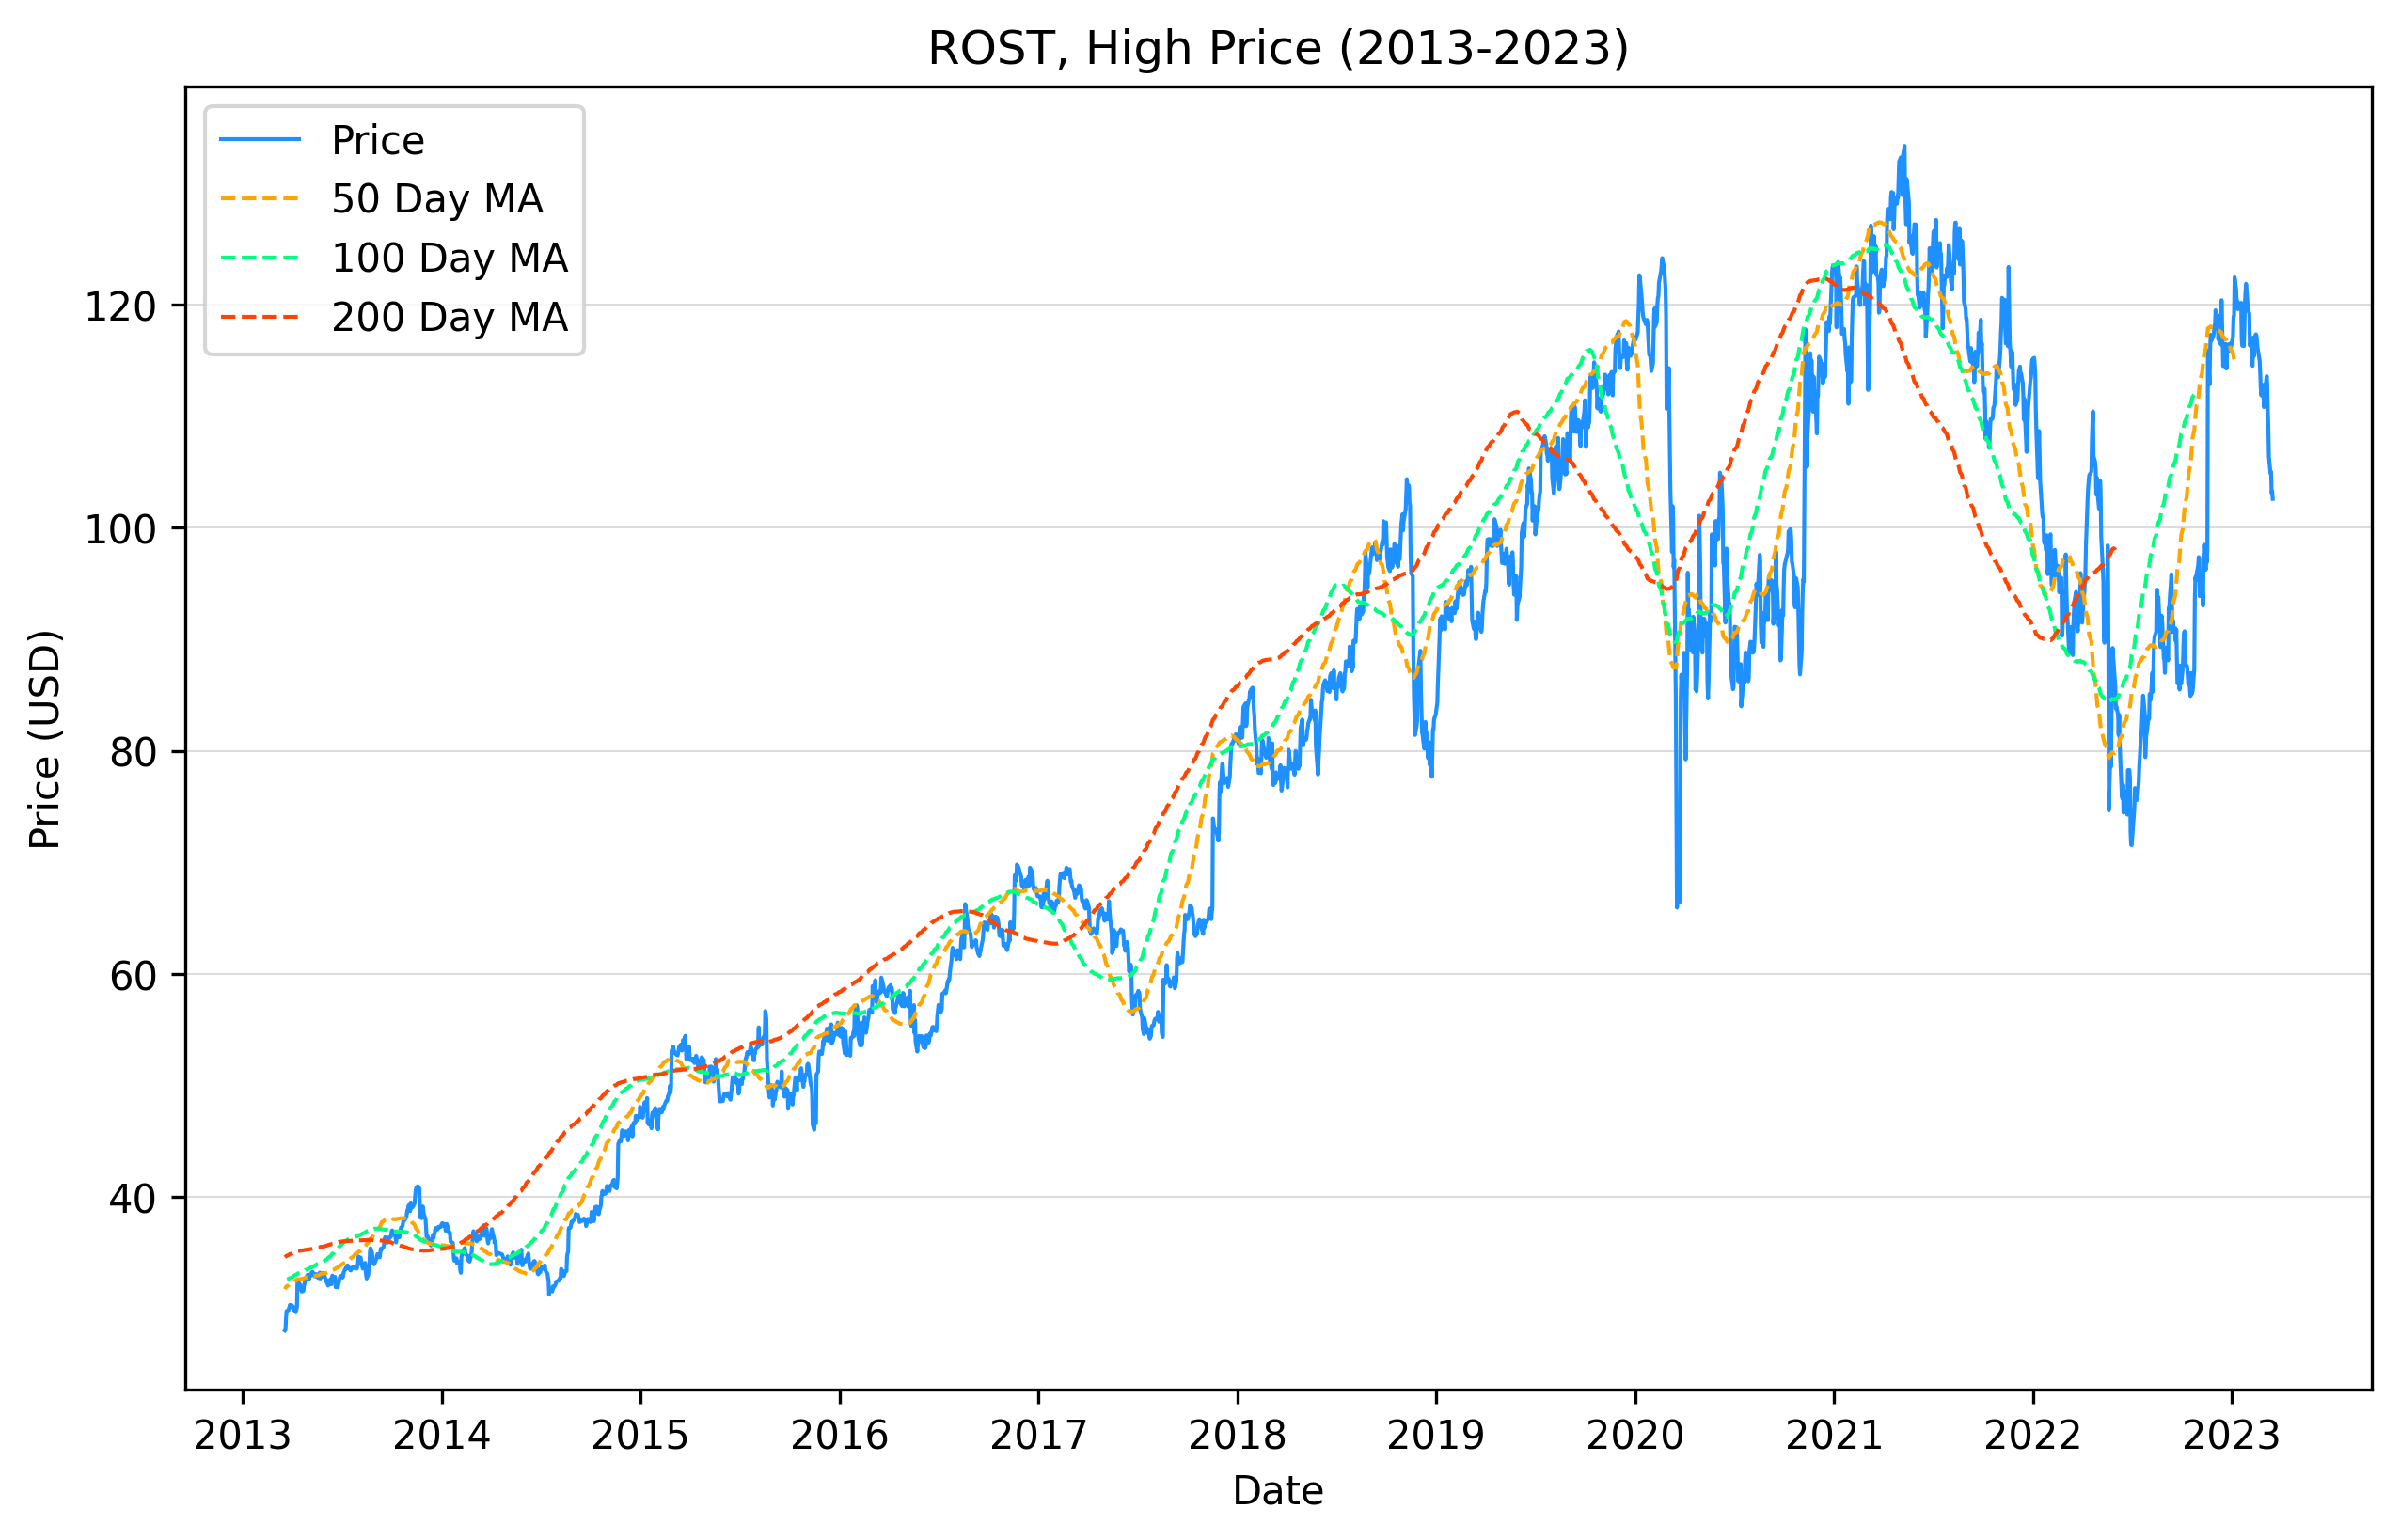

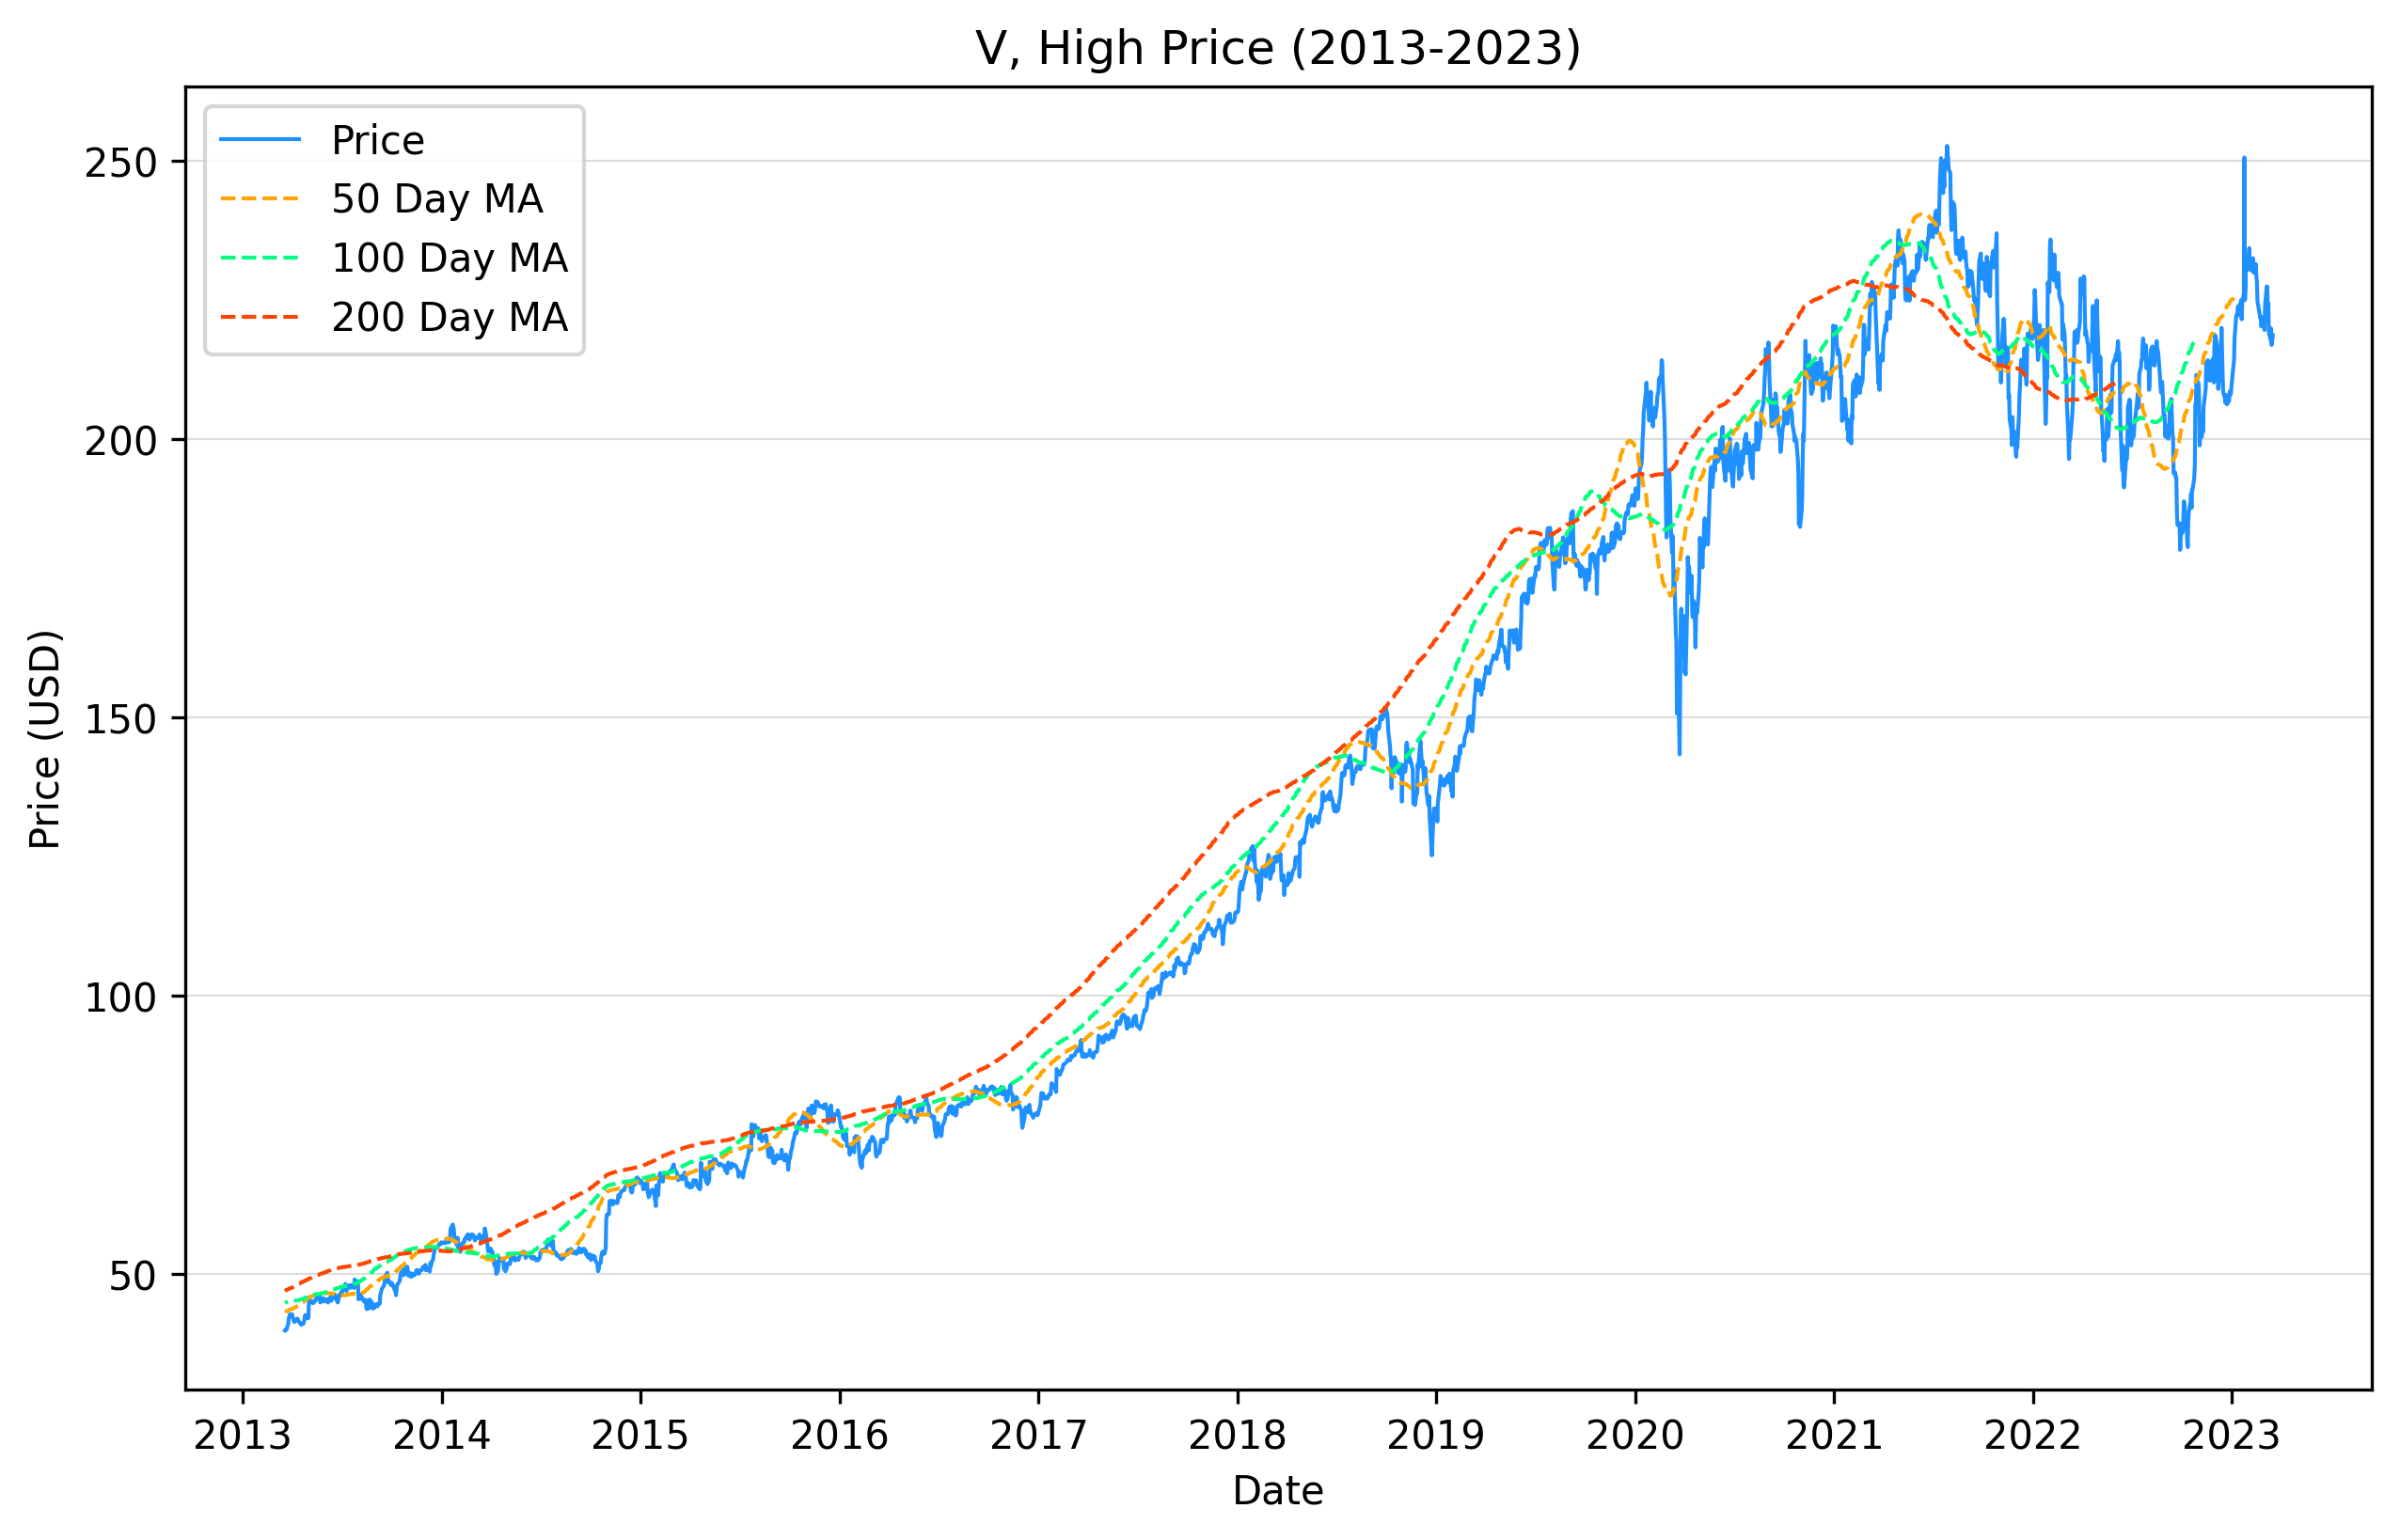

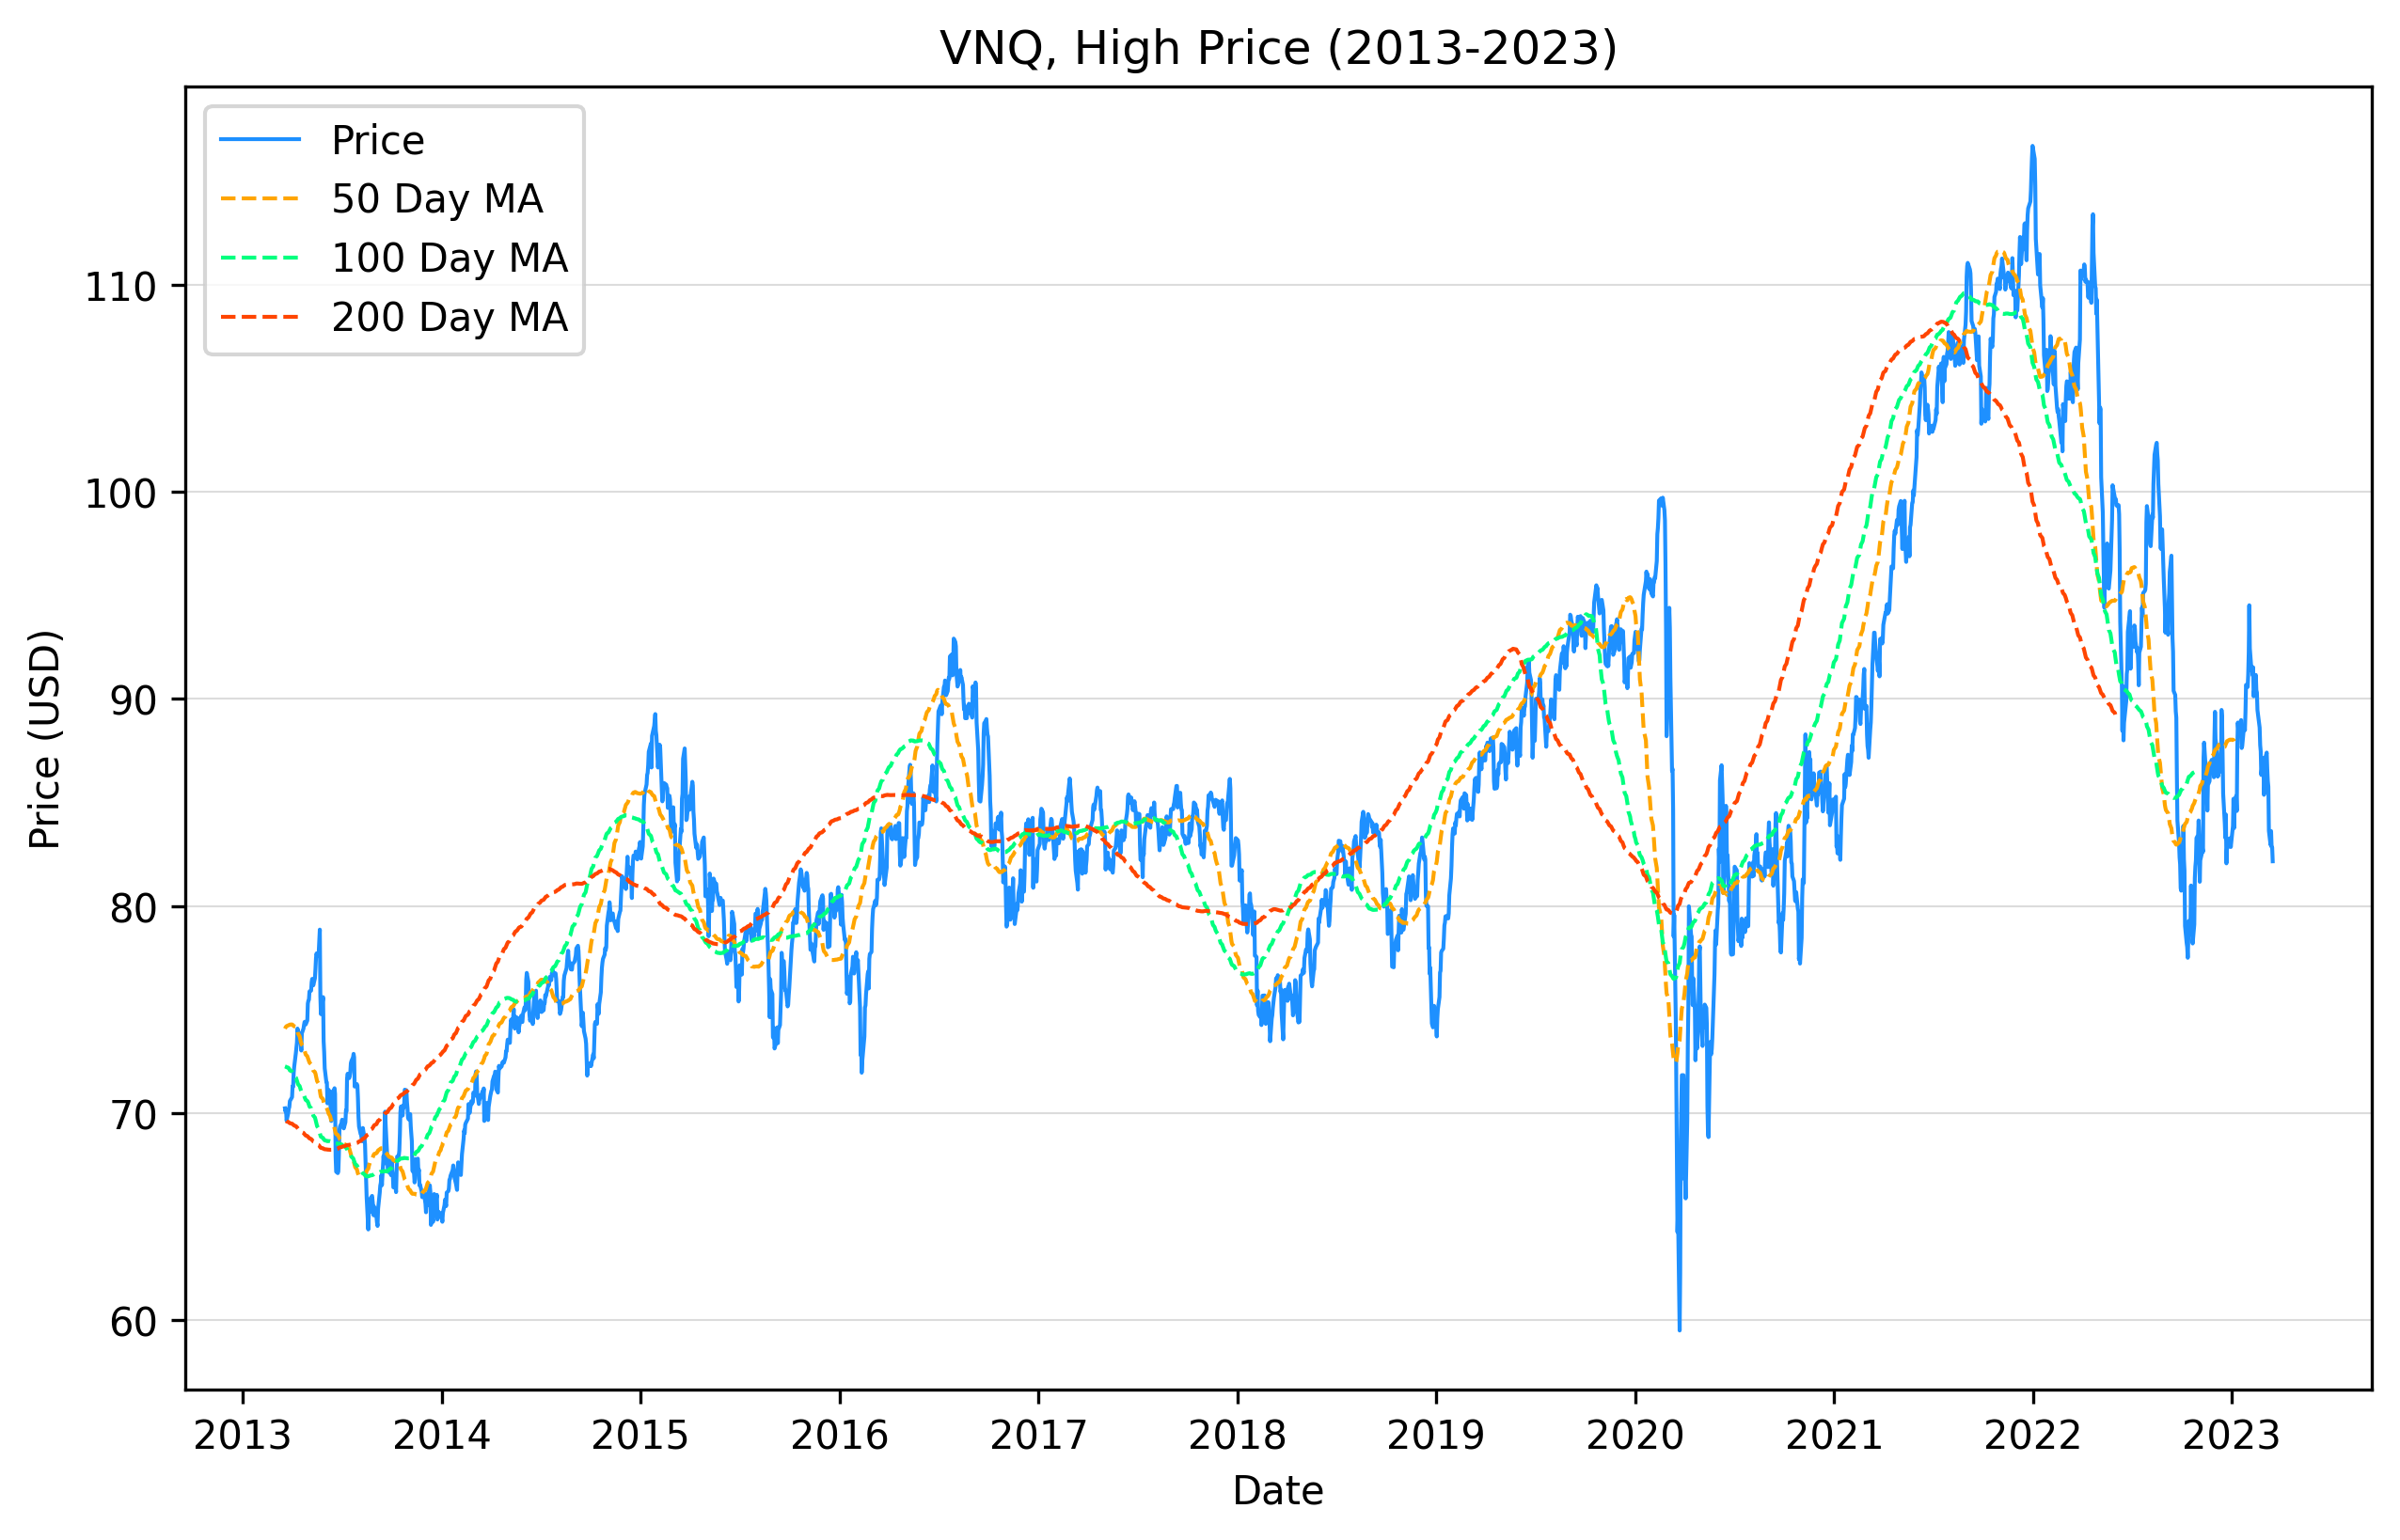

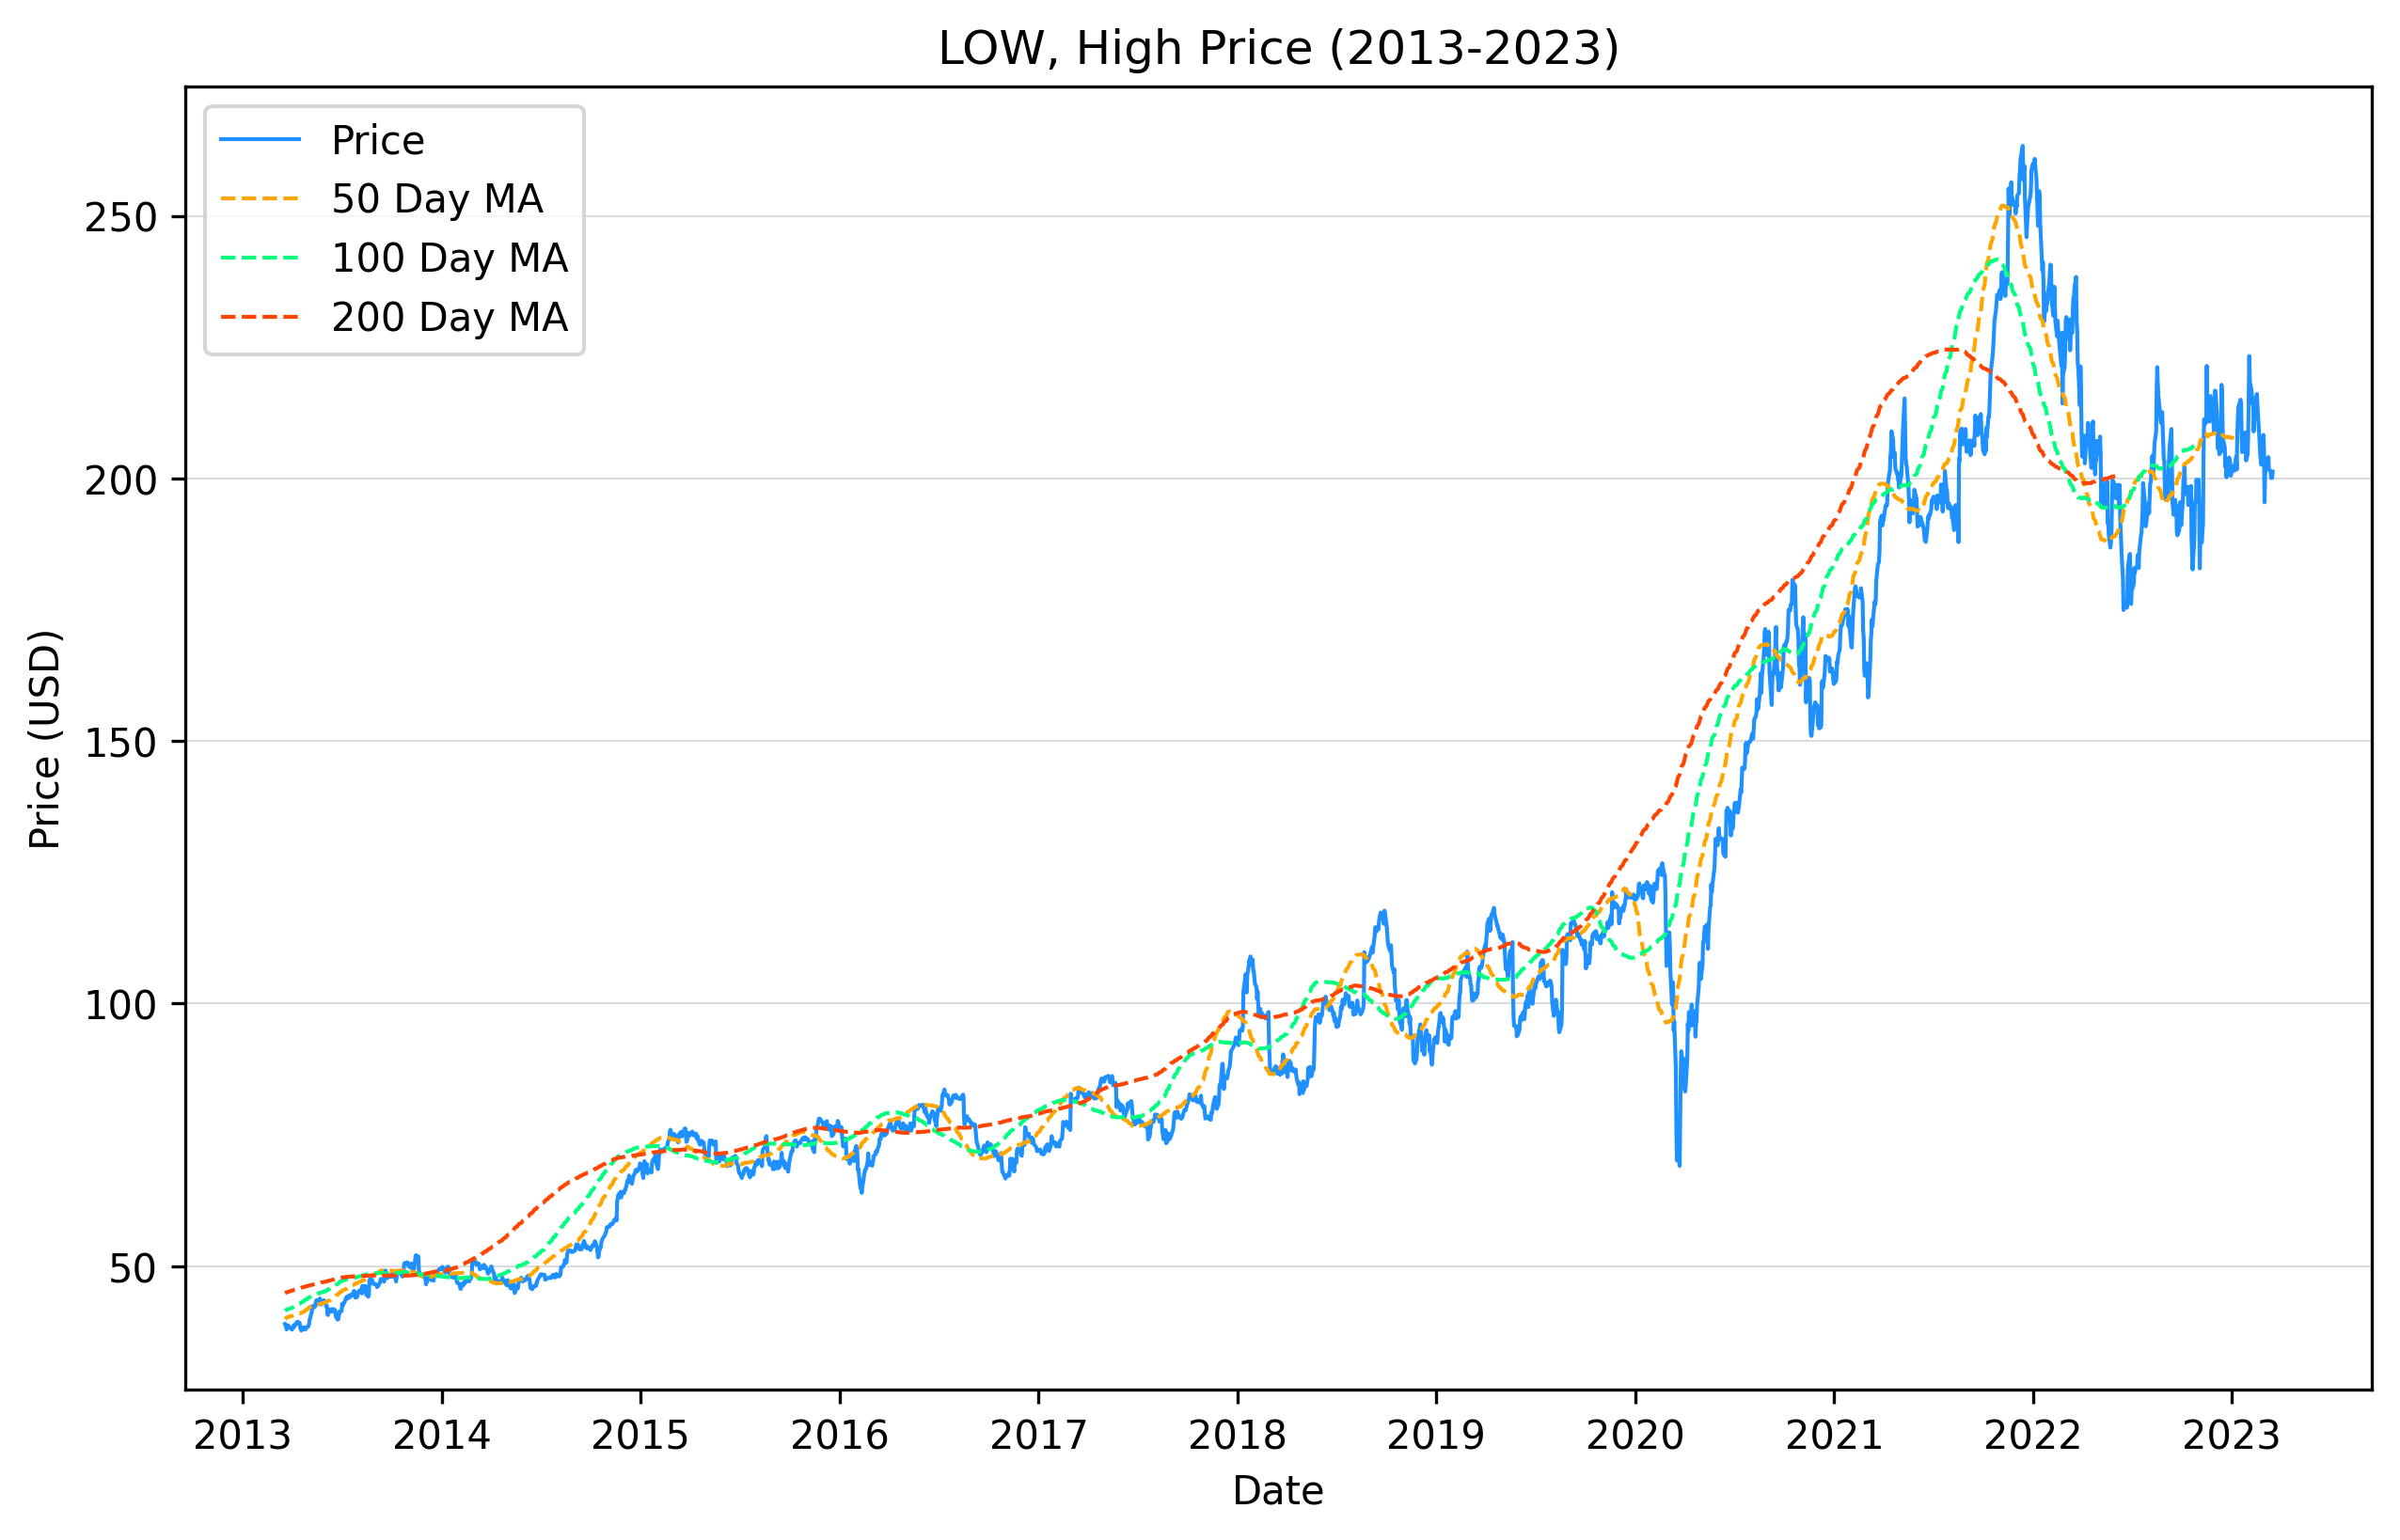

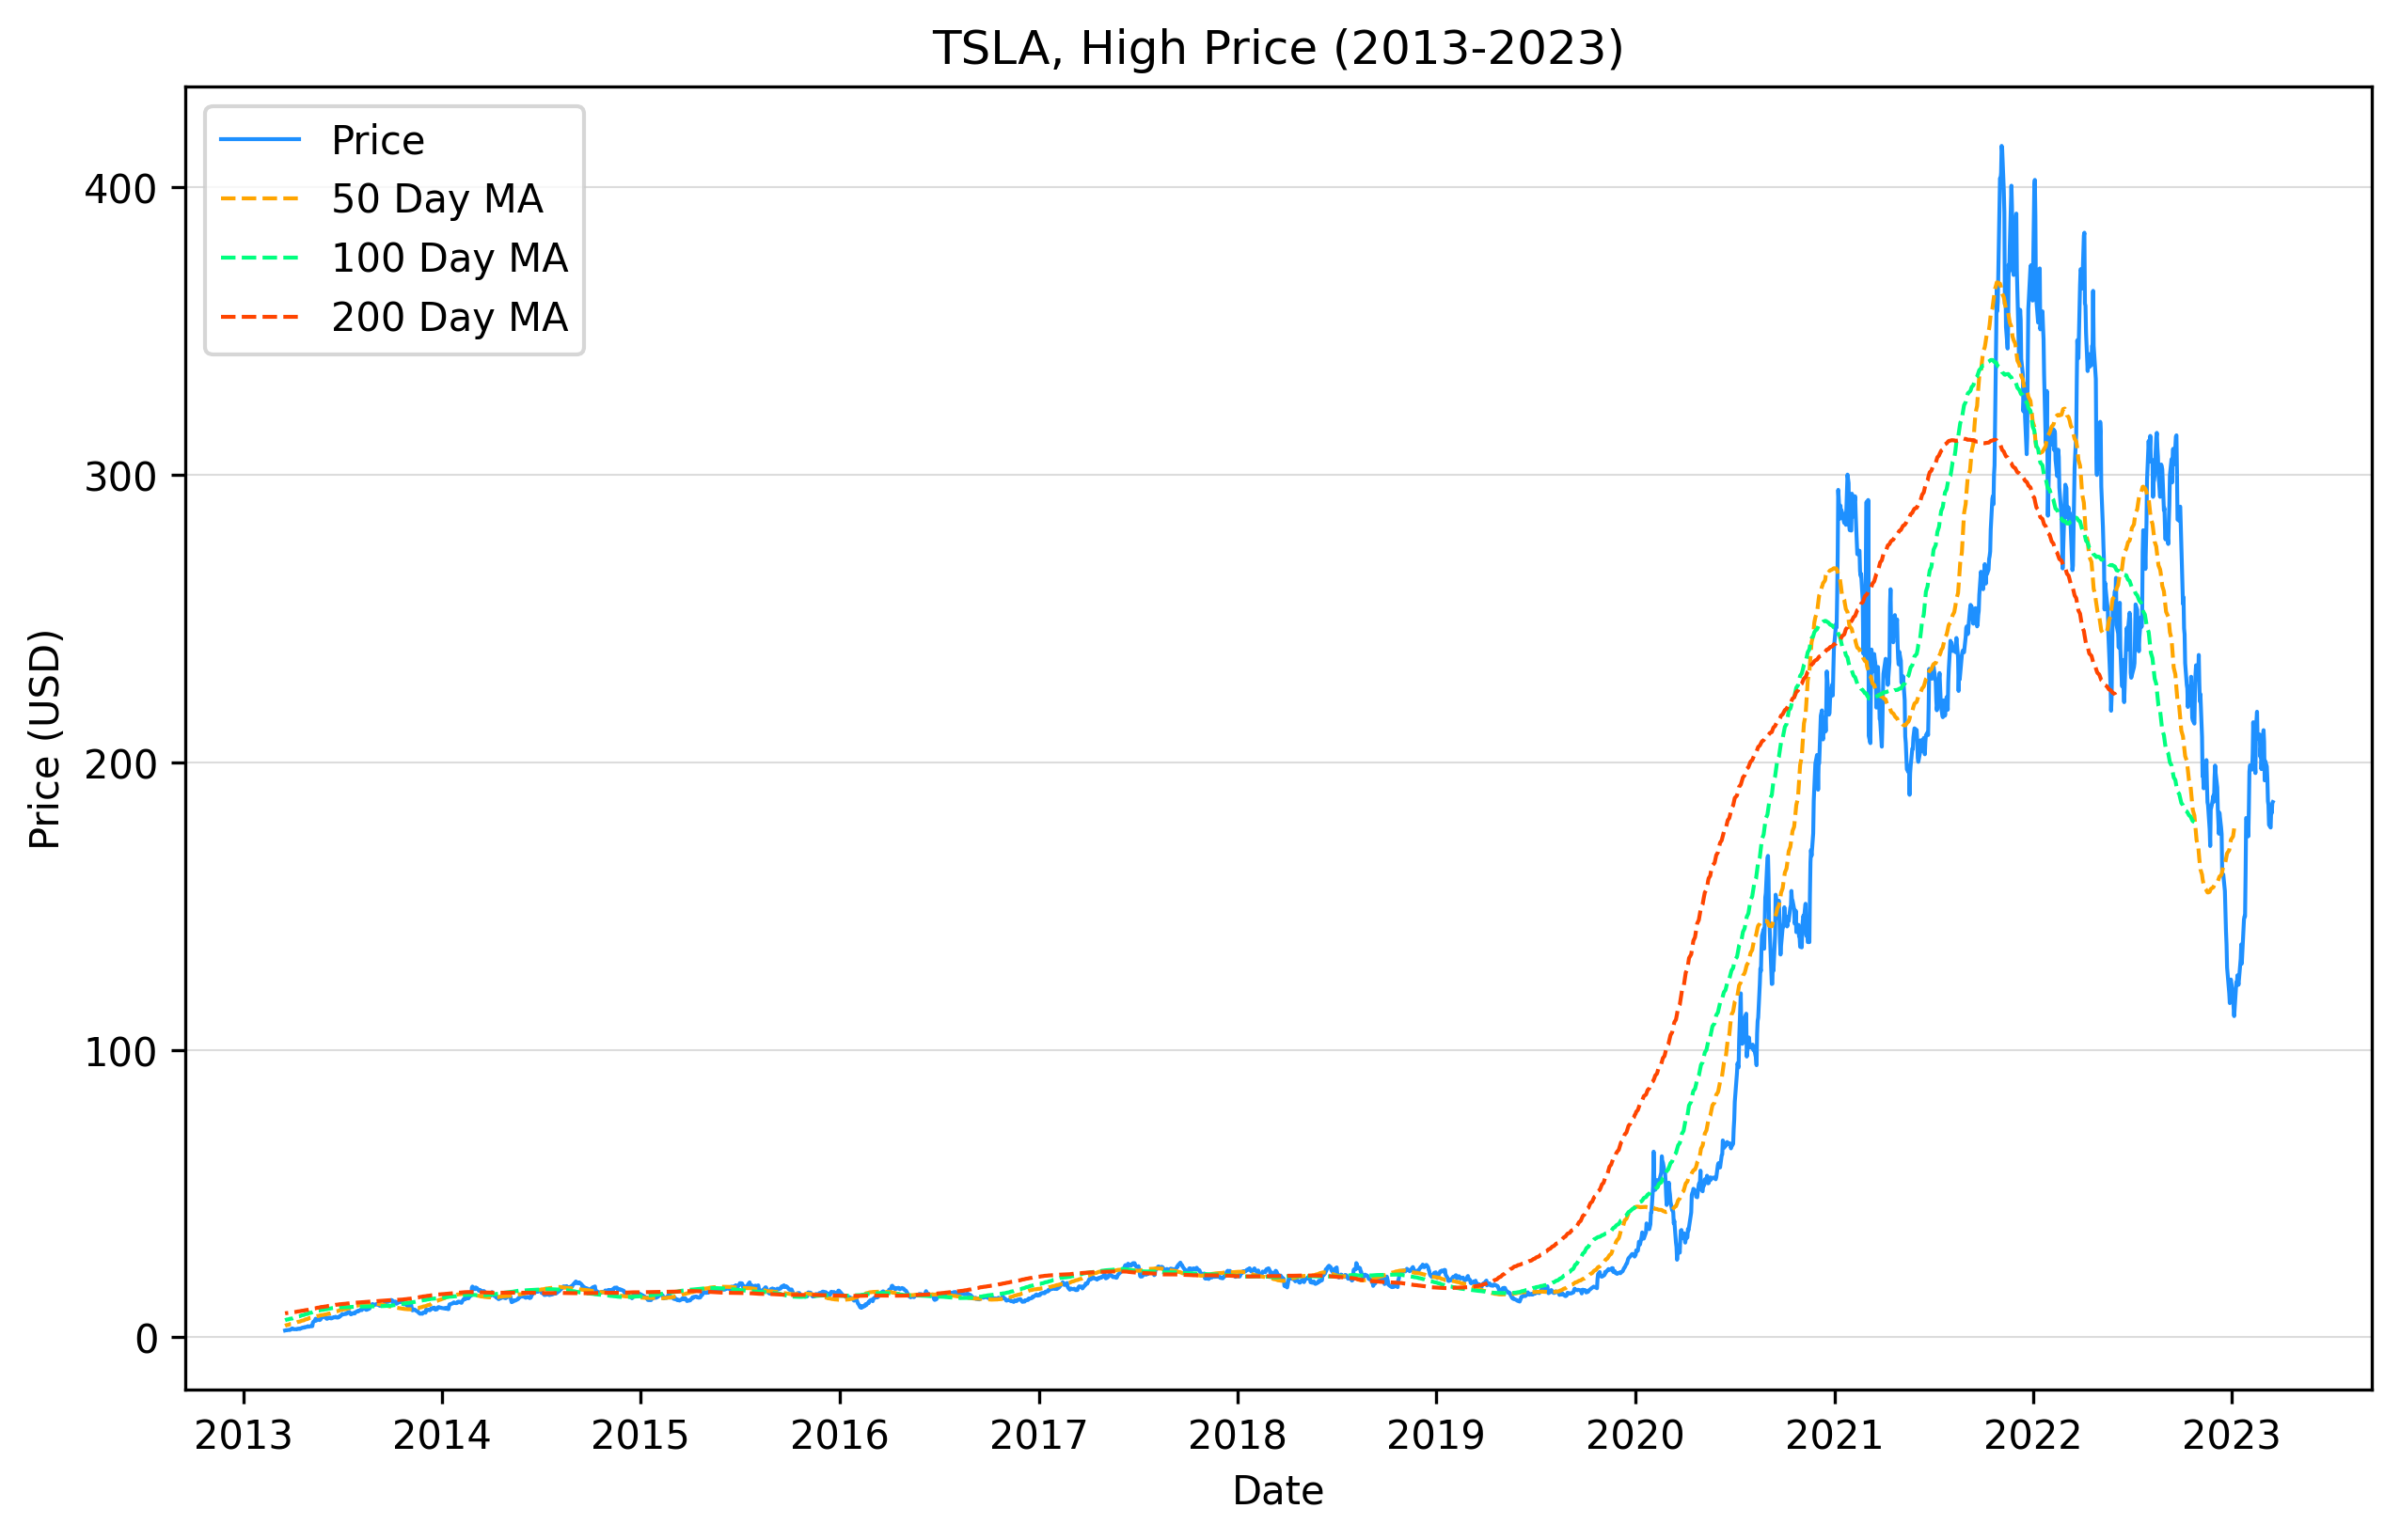

In [28]:
for f in train_data_files:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	df["high_rolling_50"] = df["High"].rolling(50).mean()
	df["high_rolling_100"] = df["High"].rolling(100).mean()
	df["high_rolling_200"] = df["High"].rolling(200).mean()
	 
	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(df["High"], linewidth=1, color='dodgerblue', label="Price")
	plt.plot(df["high_rolling_50"], linewidth=1, label="50 Day MA", color='orange', ls='--')
	plt.plot(df["high_rolling_100"], linewidth=1, label="100 Day MA", color='springgreen', ls='--')
	plt.plot(df["high_rolling_200"], linewidth=1, label="200 Day MA", color='orangered', ls='--')

	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, High Price (2013-2023)")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}.svg", bbox_inches="tight", format='svg')

for f in test_data_files:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	df["high_rolling_50"] = df["High"].rolling(50).mean()
	df["high_rolling_100"] = df["High"].rolling(100).mean()
	df["high_rolling_200"] = df["High"].rolling(200).mean()
	 
	plt.figure(figsize=(10,6), dpi=300)
	plt.plot(df["High"], linewidth=1, color='dodgerblue', label="Price")
	plt.plot(df["high_rolling_50"], linewidth=1, label="50 Day MA", color='orange', ls='--')
	plt.plot(df["high_rolling_100"], linewidth=1, label="100 Day MA", color='springgreen', ls='--')
	plt.plot(df["high_rolling_200"], linewidth=1, label="200 Day MA", color='orangered', ls='--')

	plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
	plt.title(f"{f}, High Price (2013-2023)")
	plt.ylabel("Price (USD)")
	plt.xlabel("Date")
	plt.legend()
	plt.savefig(vis_path + f"{f}.svg", bbox_inches="tight", format='svg')

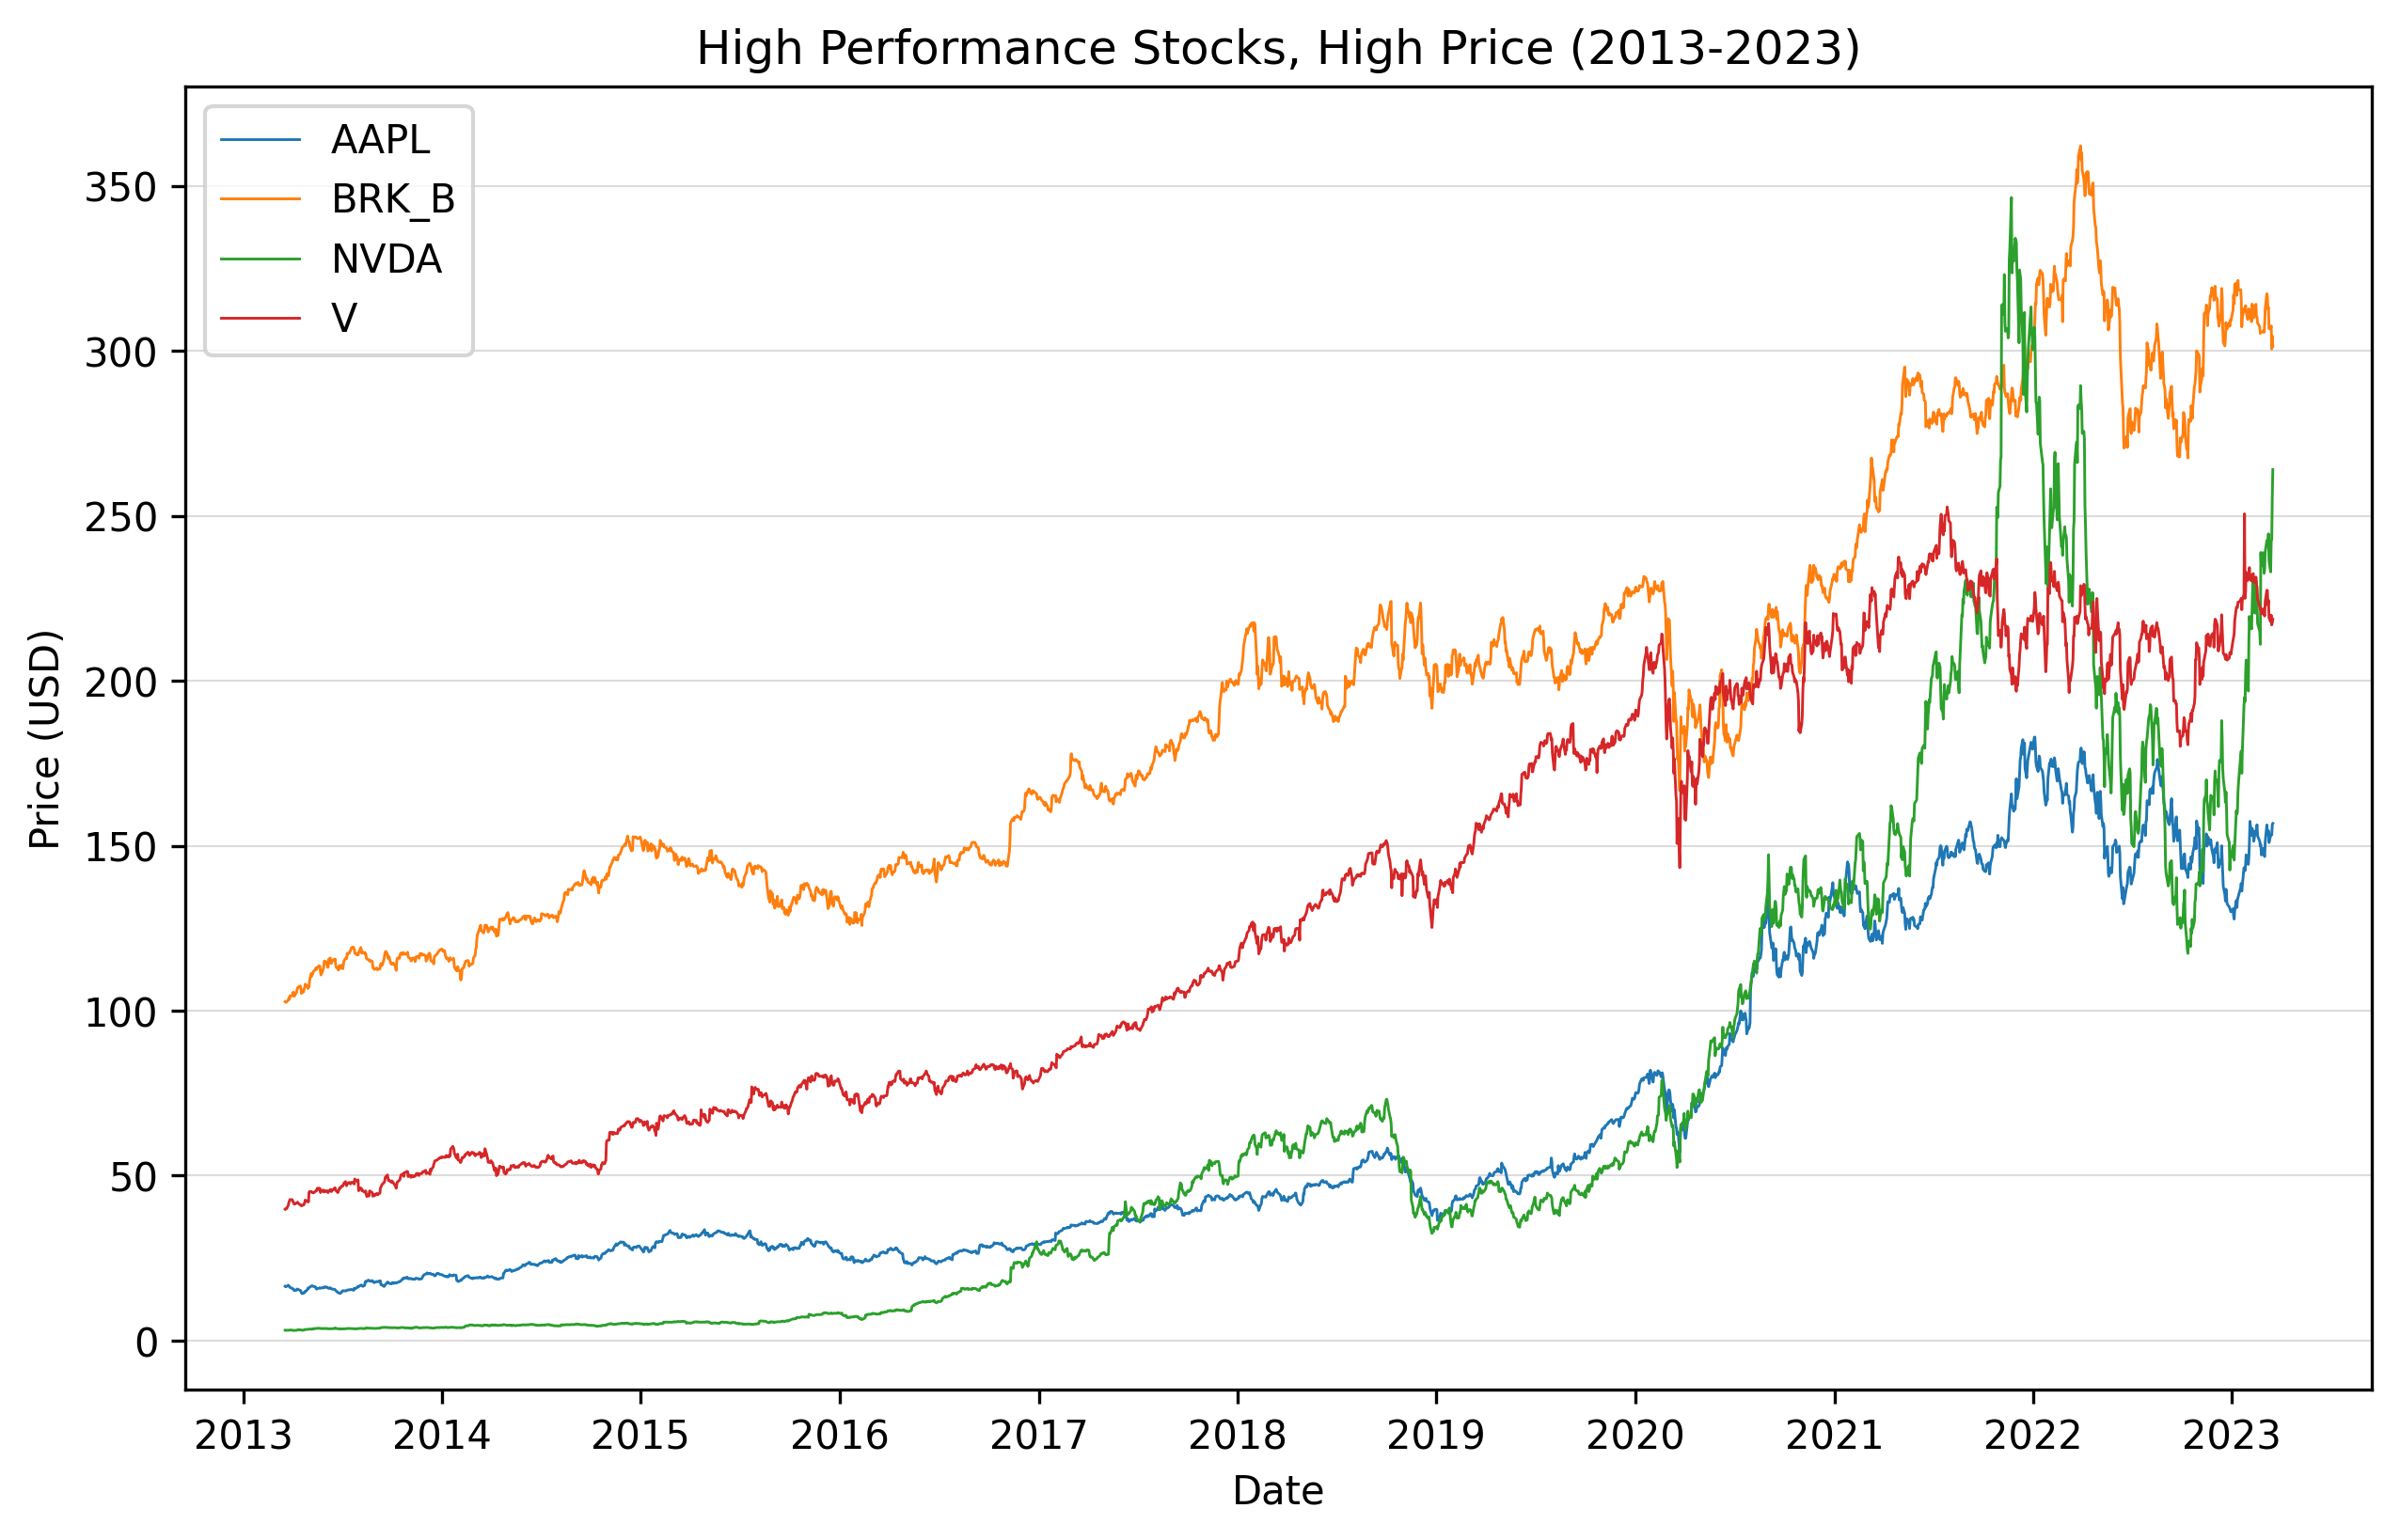

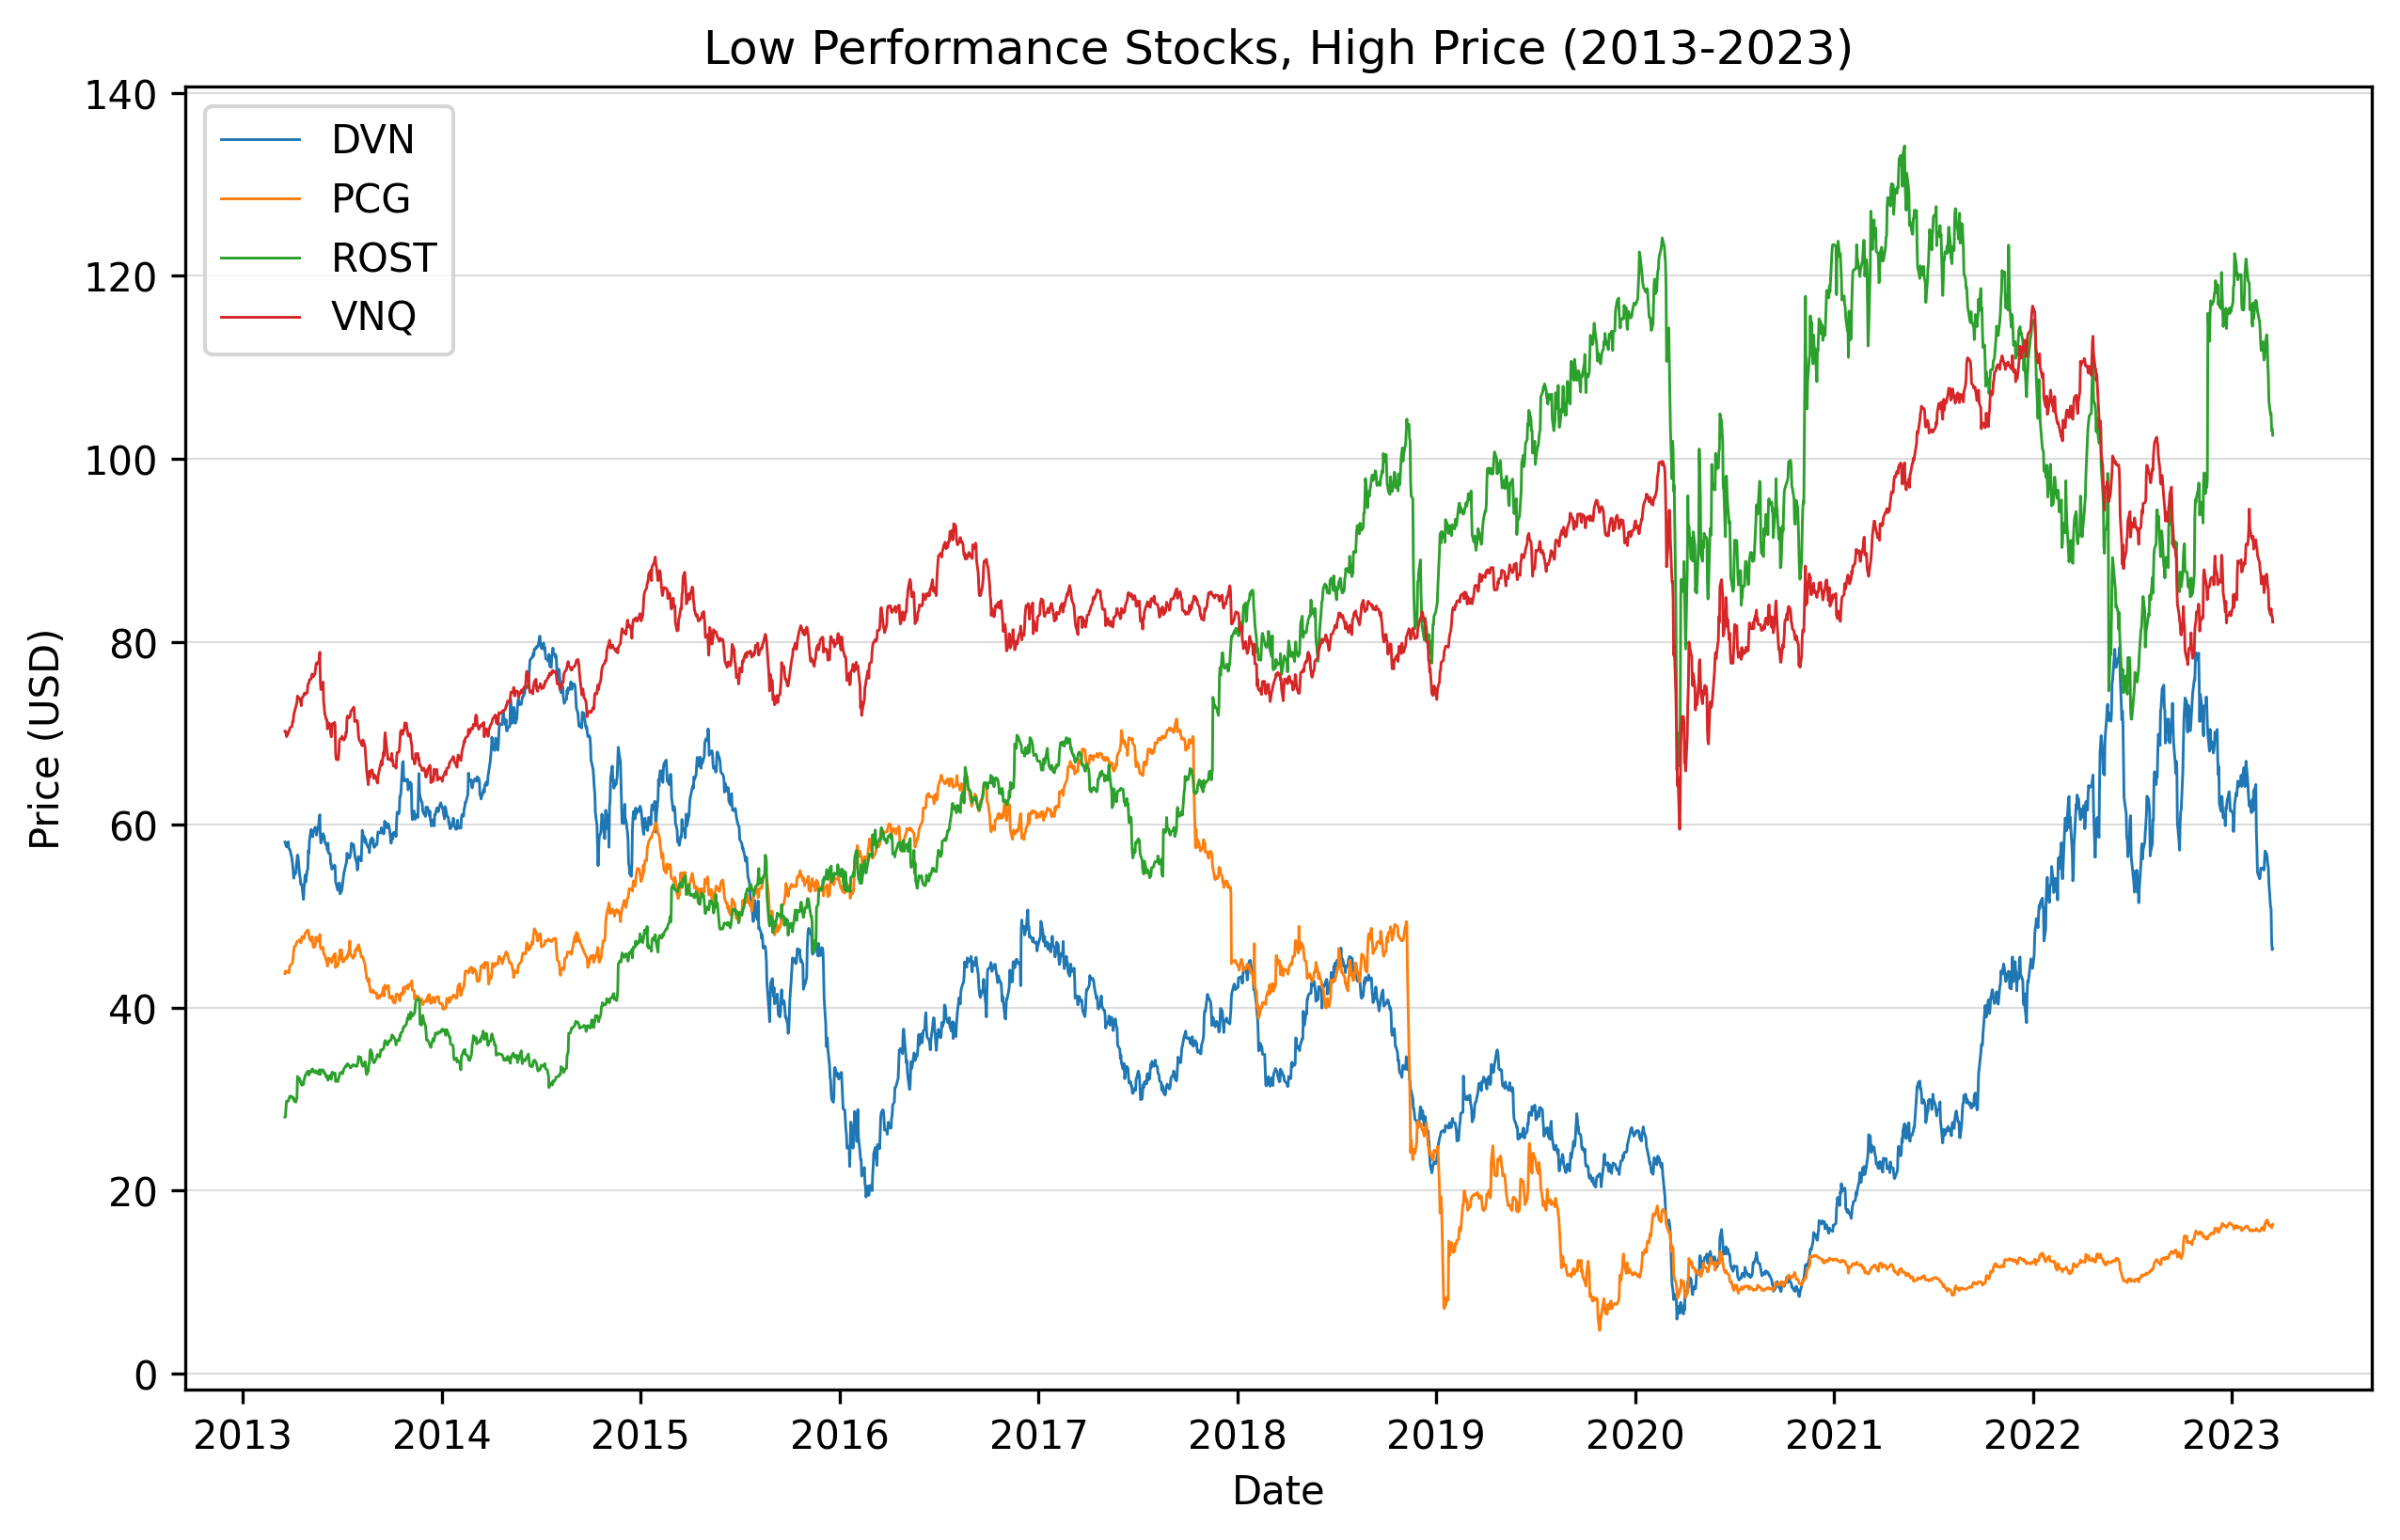

In [29]:
good = ["AAPL", "BRK_B", "NVDA", "V"]
bad = ["DVN", "PCG", "ROST", "VNQ"]

plt.figure(figsize=(10,6), dpi=300)

for f in good:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")
	
	plt.plot(df["High"], linewidth=0.7, label=f)

plt.title(f"High Performance Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"high_perf.svg", bbox_inches="tight", format='svg')


plt.figure(figsize=(10,6), dpi=300)

for f in bad:
	df = pd.read_csv(train_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	plt.plot(df["High"], linewidth=0.7, label=f)

plt.title(f"Low Performance Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"low_perf.svg", bbox_inches="tight", format='svg')

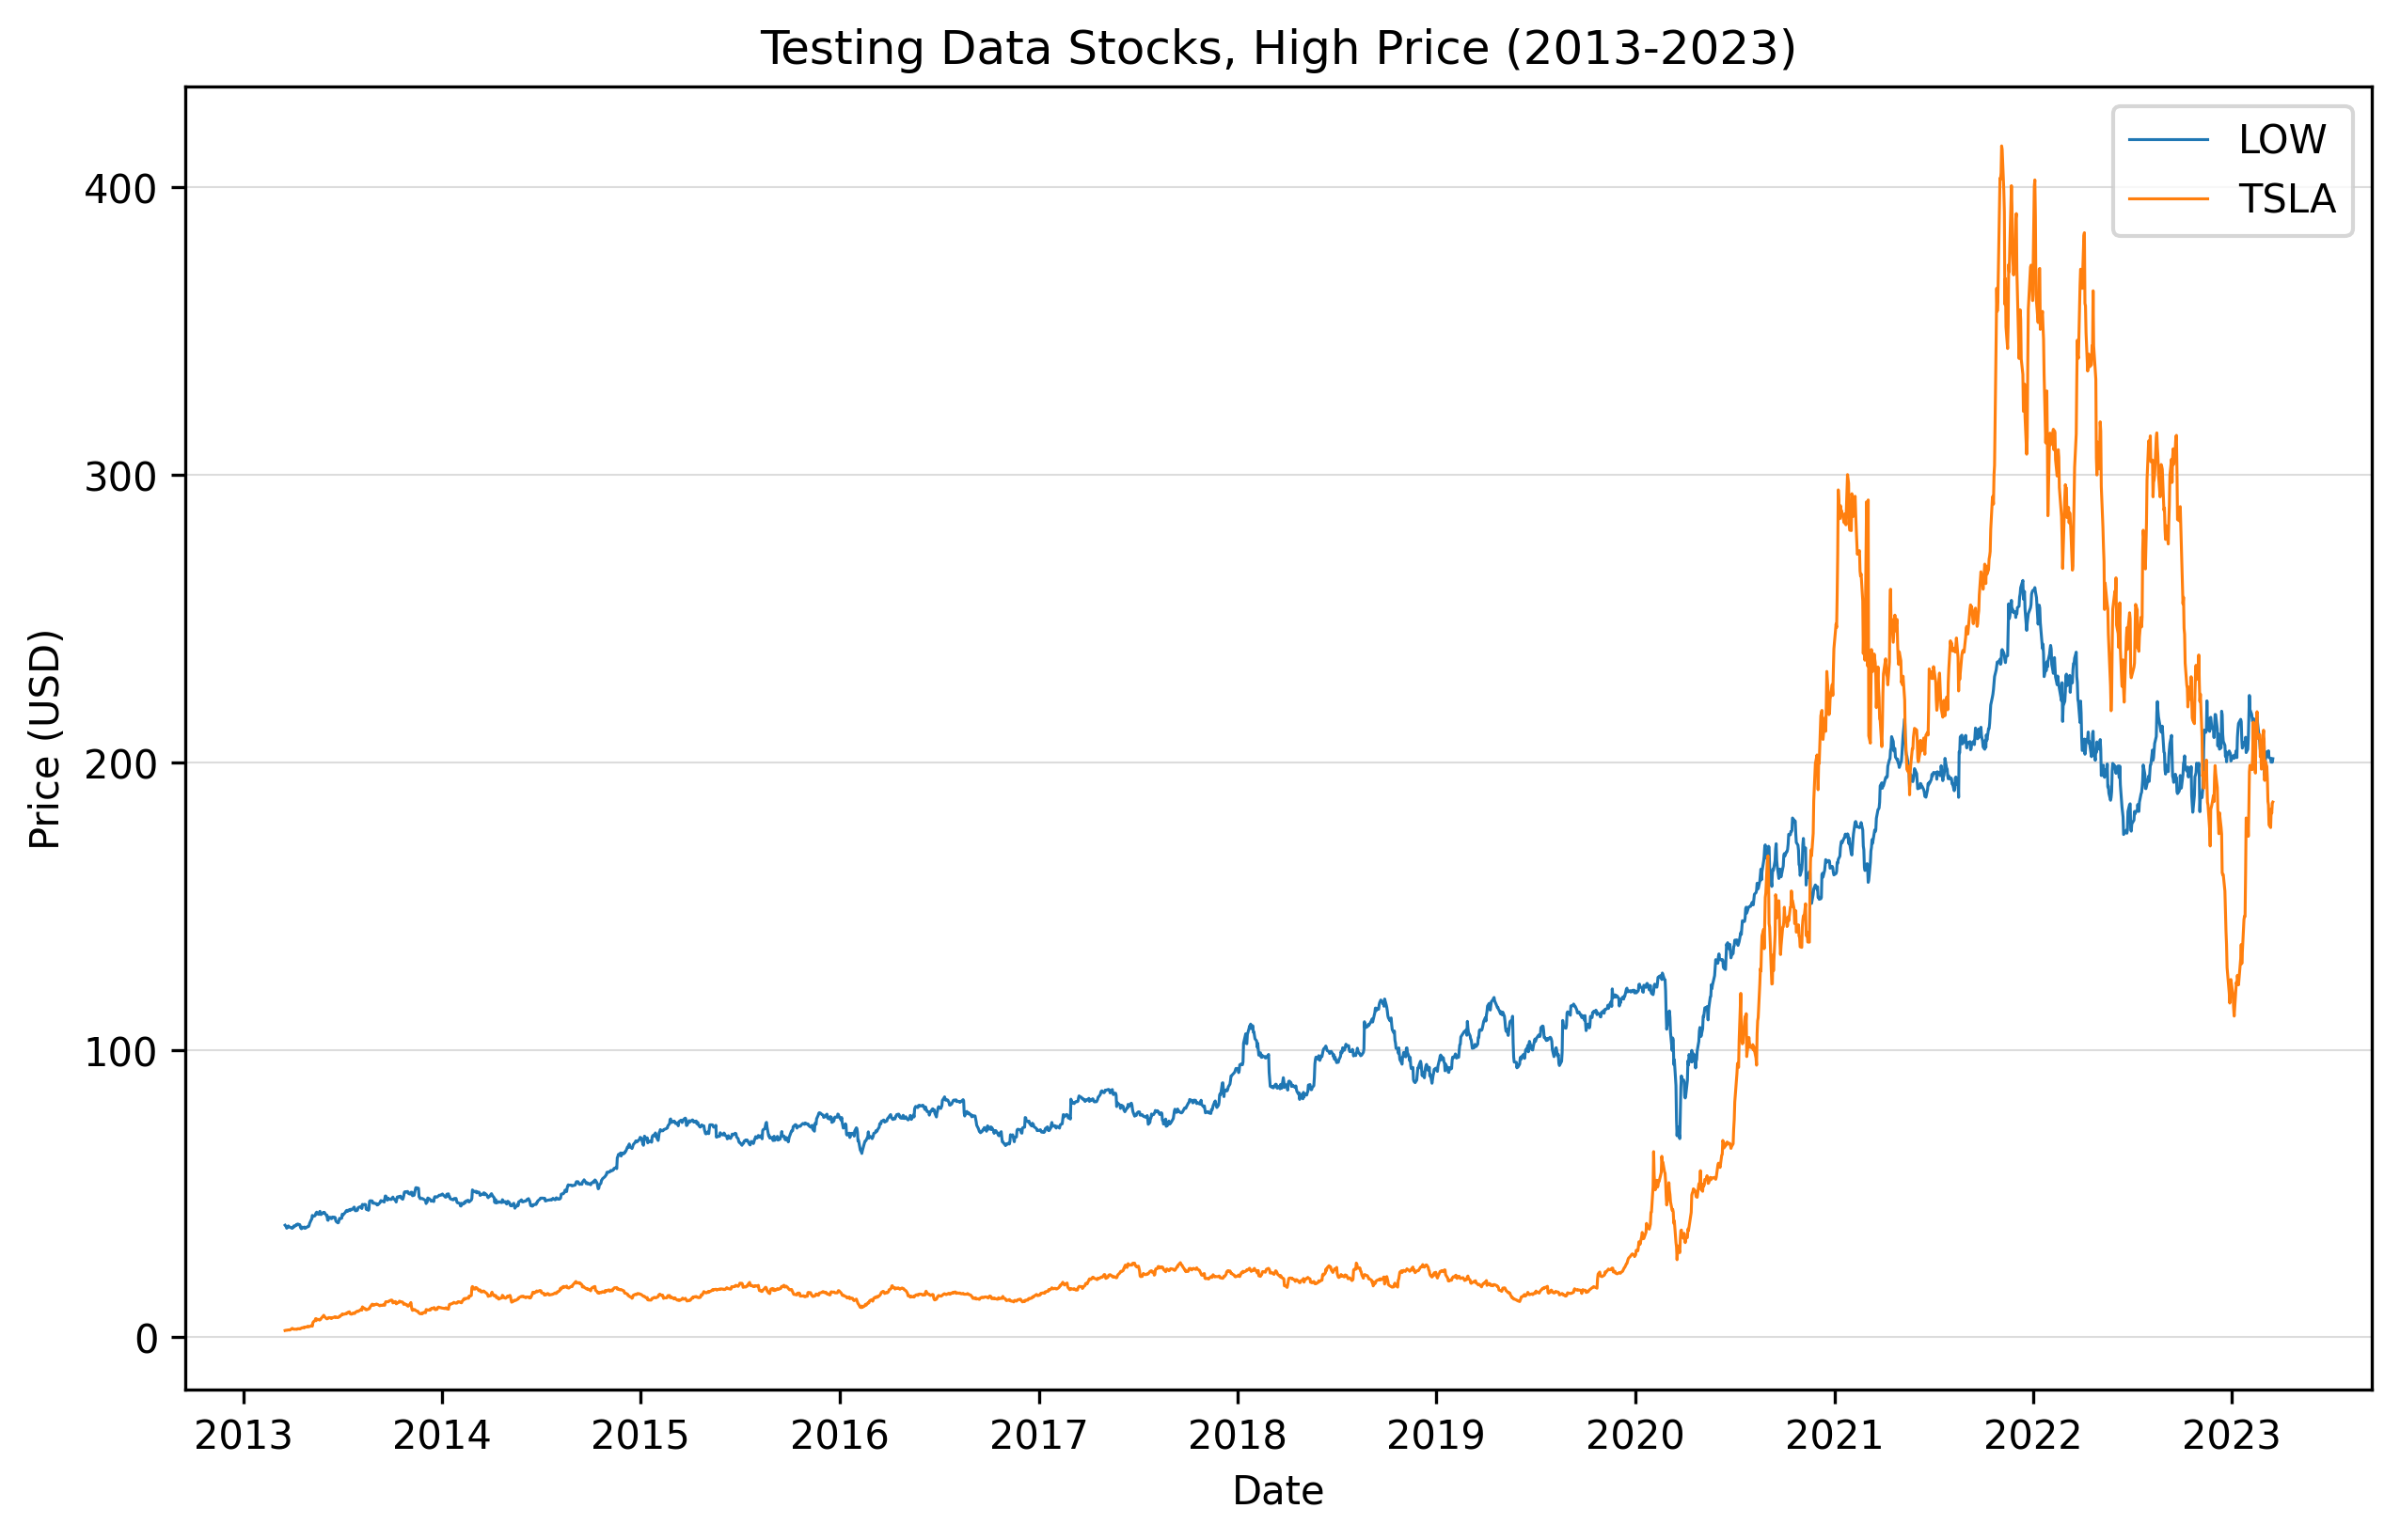

In [31]:
test_data = ["LOW", "TSLA"]

plt.figure(figsize=(10,6), dpi=300)

for f in test_data:
	df = pd.read_csv(test_data_path + f + "_clean.csv", parse_dates=["Date"], index_col="Date")

	plt.plot(df["High"], linewidth=0.75, label=f)

plt.title(f"Testing Data Stocks, High Price (2013-2023)")
plt.grid(axis='y', color='gainsboro', linestyle='-', linewidth=0.5)
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.savefig(vis_path + f"test.svg", bbox_inches="tight", format='svg')